# **Music Recommendation System**



## **Problem Definition**


---


### **Context:**


---


Technology has reshaped how we live, making our daily lives more time efficient while simultaneously increasing the opportunities for distraction. People are better able to multitask, but they may struggle with attention span or finding time to give towards artistic endeavors while balancing their fast-paced lives and daily obligations. Fortunately, technology has made it easier for people to discover art & entertainment, even with limited time and attention.

For most internet-based companies, the business model depends on capturing and retaining user interest. These companies need to be able to identify content that is alluring enough to increase the time spent on their platforms. And this is no small task, given the diverse individual preferences of users.

Spotify, a global giant in audio streaming, stands out as a company that understands how to keep its users engaged, even despite the oversaturated music marketplace. Using powerful recommendation systems, Spotify is able to sift through vast amounts of data on user preferences, connecting millions of listeners with billions of songs. By doing so, Spotify can recommend the next song that a user is likely to enjoy, making the search for new music less of a time-consuming chore and more of a personalized experience. This intelligent approach to content recommendation is a key reason why Spotify continues to grow and succeed in the crowded digital landscape.


---


### **Objective:**


---


Build a recommendation system designed to curate the top songs for a user, tailored specifically to their listening preferences and predicted likelihood of enjoyment.


---


### **Key Questions** and **Considerations:**


---


**Identifying User Preferences**
- How will we evaluate user listening history to successfully and accurately infer user preferences?

**Song Characteristics**
- What features of songs are the most predictive of user preferences? What artists, release information, etc. can resonate best with any given user?

**Personalized Experience** for **Users**
- How can we capture the *individual* preferences of users, as opposed to feeding music recommendations simply based on general popularity?

**Engagement Metrics**
- What metrics can we use to measure the success of our recommendations?

**Model Adaptability** and **Scalability**
- What strategies can be employed to ensure the recommendation system remains responsive to shifts in user preferences? How do we continuously integrate new genres and artists into the mix?


---


### **Problem Formulation**:


---


Central to our project is **the challenge of interpreting complex listening patterns and user preferences** from a massive dataset of songs and interactions. Using data science and ML, we aim to accomplish the following:

- **Select, tailor, and optimize** ML algorithms that will perform best for our dataset and objective. We'll need to build models capable of processing and learning from user data to predict potential song preferences with high accuracy.
    
- **Implement** a model that not only identifies songs with the highest likelihood of user enjoyment but also provides diverse recommendations to enhance musical discovery.

- **Evaluate** the effectiveness of our recommendations through testing, focusing on metrics that authentically reflect user satisfaction and increased engagement with the platform.

By addressing the above, we can better connect users and their next favorite song, thus enriching their listening experience through **highly personalized, data-driven recommendations**.



---



## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users. At first glance, these song_data features do not include genre or song tags. We'll see if this poses any issues.


**song_data**

- **song_id** - A unique id given to every song

- **title** - Title of the song

- **Release** - Name of the released album

- **Artist_name** - Name of the artist

- **year** - Year of release

**count_data**

- **user _id** - A unique id given to the user

- **song_id** - A unique id given to the song

- **play_count** - Number of times the song was played


## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162739 sha256=9d7628eda4187d2b599b4bc6f19f9739ca3b70a26b67624490fae18b3f25df14
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Libraries for mathematical operations and dataframe computations
import numpy as np
import pandas as pd

# Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections so that dictionary outputs do not raise key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [4]:
# Import datasets and save copies + set some possible na values that could affect count_df
count_df_original = pd.read_csv('/content/drive/MyDrive/Capstone Project/count_data.csv', na_values=['None', 'Not Given', 'N/A', 'Unknown'])

count_df = count_df_original.copy()

song_df_original = pd.read_csv('/content/drive/MyDrive/Capstone Project/song_data.csv')

song_df = song_df_original.copy()

### **Understanding the data by viewing a few observations**

In [5]:
# Check rows and columns totals
count_df.shape

(2000000, 4)

In [6]:
# Check rows and columns totals
song_df.shape

(1000000, 5)

In [7]:
# See first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [8]:
# See first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [9]:
# Check value counts for song_df across several features
song_df['song_id'].value_counts().head(10)

SOUYQYY12AF72A000F    3
SOKUAGP12A8C133B94    3
SOFQIZF12A67ADE730    3
SOBPICV12A8151CDF1    3
SORBGBD12A8C141CEA    3
SONBEKD12AB01894DC    3
SOBPAEP12A58A77F49    3
SOUWROC12A8C141CF3    3
SOQNMCD12A8C1383D4    3
SOODBWM12A6D4F6B0E    3
Name: song_id, dtype: int64

In [10]:
song_df['title'].value_counts().head(10)

Intro           1510
Untitled         414
Outro            350
Interlude        298
Home             237
Silent Night     221
Time             210
Hold On          202
Tonight          183
Summertime       177
Name: title, dtype: int64

In [11]:
song_df['release'].value_counts().head(10)

Greatest Hits              2014
Live                       1197
The Collection              843
The Ultimate Collection     791
The Very Best Of            741
The Best Of                 658
The Platinum Collection     566
Best Of                     519
Gold                        498
Anthology                   470
Name: release, dtype: int64

In [12]:
artist_count = song_df['artist_name'].value_counts()
artist_count.head(15)

Michael Jackson       194
Johnny Cash           193
Beastie Boys          187
Joan Baez             181
Neil Diamond          176
Duran Duran           175
Radiohead             173
Franz Ferdinand       173
Aerosmith             173
The Rolling Stones    171
The Doors             171
Jimi Hendrix          170
The Cure              169
Ella Fitzgerald       168
Faron Young           168
Name: artist_name, dtype: int64

**Observations**:

There is a high prevalence of greatest hits/best of, live albums, compilations, anthologies, and other repackagings.

There are also a lot of song titles which are making it less clear which songs are truly the most popular. A song titled "Intro" or "Outro" could certainly exist across several artists and releases, for example.

From the initial song_df dataset, we see the top 5 artists that appear most frequently are:

- Michael Jackson
- Johnny Cash
- Beastie Boys
- Joan Baez
- Neil Diamond

In [13]:
song_df['year'].value_counts().head(10)

0       484424
2007     39414
2006     37546
2005     34960
2008     34770
2009     31051
2004     29618
2003     27389
2002     23472
2001     21604
Name: year, dtype: int64

In [14]:
song_df['year'].value_counts(ascending=False)

0       484424
2007     39414
2006     37546
2005     34960
2008     34770
         ...  
1925         7
1922         6
1933         6
1924         5
2011         1
Name: year, Length: 90, dtype: int64

In [15]:
song_df['year'].value_counts().head(20)

0       484424
2007     39414
2006     37546
2005     34960
2008     34770
2009     31051
2004     29618
2003     27389
2002     23472
2001     21604
2000     19293
1999     18262
1998     15858
1997     15182
1996     14135
1995     13260
1994     12127
1993     10529
1992      9547
2010      9397
Name: year, dtype: int64

In [16]:
sorted_unique_years = sorted(song_df['year'].unique())
print(sorted_unique_years)

[0, 1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


In [17]:
# Aggregate by 'year' and count the entries, then convert to DataFrame
year_counts = song_df.groupby('year').size().reset_index(name='count')
year_counts

,year,count
0,0,484424
1,1922,6
2,1924,5
3,1925,7
4,1926,19
...,...,...
85,2007,39414
86,2008,34770
87,2009,31051
88,2010,9397


In [18]:
year_counts.sort_values(by='count', ascending=False).head(10)

,year,count
0,0,484424
85,2007,39414
84,2006,37546
83,2005,34960
86,2008,34770
87,2009,31051
82,2004,29618
81,2003,27389
80,2002,23472
79,2001,21604


**Observations**:

- The years in the data span from 1922 to 2011, with most titles coming from 2001. In fact, 2001 is overly represented in song_df in comparison to other years. When we impute missing year values, the most prominent year might change.

In [19]:
count_df['song_id'].value_counts().sort_values(ascending=False)

SOFRQTD12A81C233C0    8277
SOAUWYT12A81C206F1    7032
SOAXGDH12A8C13F8A1    6949
SOBONKR12A58A7A7E0    6412
SOSXLTC12AF72A7F54    6145
                      ... 
SOLIGVL12AB017DBAE      51
SOWNLZF12A58A79811      51
SOBPGWB12A6D4F7EF3      50
SOGSPGJ12A8C134FAA      48
SOYYBJJ12AB017E9FD      48
Name: song_id, Length: 10000, dtype: int64

In [20]:
song_ids = ['SOFRQTD12A81C233C0', 'SOAUWYT12A81C206F1', 'SOAXGDH12A8C13F8A1', 'SOBONKR12A58A7A7E0', 'SOSXLTC12AF72A7F54']
song_ids_clean = song_df[song_df['song_id'].isin(song_ids)]
song_ids_clean

,song_id,title,release,artist_name,year
111102,SOAUWYT12A81C206F1,Undo,Vespertine Live,Björk,2001
151710,SOAXGDH12A8C13F8A1,Dog Days Are Over (Radio Edit),Now That's What I Call Music! 75,Florence + The Machine,0
448841,SOBONKR12A58A7A7E0,You're The One,If There Was A Way,Dwight Yoakam,1990
808198,SOFRQTD12A81C233C0,Sehr kosmisch,Musik von Harmonia,Harmonia,0
865618,SOSXLTC12AF72A7F54,Revelry,Only By The Night,Kings Of Leon,2008


**Observations**:

The top songs under count_df are as follows:
- "Sehr kosmisch" off the release, *Musik von Harmonia*  as performed by Harmonia
- "Undo" off the release *Vespertine Live* as performed by Björk
- "Dog Days Are Over (Radio Edit)" off the release *Now That's What I Call Music! 75* as performed by Florence + The Machine
- "You're The One" off the release *If There Was A Way* as performed by Dwight Yoakam
- "Revelry" off the release *Only By The Night* as performed by Kings Of Leon

### **Check the data types and and missing values of each column**

In [21]:
# Ensure `song_id` is in a consistent format
count_df['song_id'] = count_df['song_id'].str.strip().str.upper()
song_df['song_id'] = song_df['song_id'].str.strip().str.upper()

In [22]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


**Observations**:

- **Song_id** is an object due to the presence of numbers and characters; we'll likely encode this feature later, so it's fine to leave now.

- **Title** is an object, and we'll want to convert this to a string dtype.

- **Release** is an object, and we'll want to convert this to a string dtype

- **Year** is an integer dtype which is OK.

There are missing values that we'll have to investigate further.


In [23]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


**Observations**:

- **Unnamed** is an int...but we may be able to drop this column.

- **User_id** is an object, likely because of a combination of numbers and characters. We may encode this later, so for now it's OK.

- **Song_id** is similarly an object like user_id; again, we may encode this later so it's alright to leave it for now.

- **Play_count** is an integer which makes sense for our purposes.

In [24]:
# Sum any null values for each feature of the dataset
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [25]:
# Checking for cells containing only a 0 in each column in case missng values are hidden
zero_cells_per_column = (song_df.eq(0)).all(axis=1)
zero_cells_per_column

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [26]:
zero_cells_per_column.nunique()

1

**Observations**:

- the **count_df** dataframe does not appear to contain any missing values.

In [27]:
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [28]:
# Replacing cells with 0 to read as NaN so we can assess empty cells
song_df["year"] = song_df["year"].replace([0], np.nan)

In [29]:
song_df.isnull().sum()

song_id             0
title              15
release             5
artist_name         0
year           484424
dtype: int64

**Observations**:
- Although the '**year**' column initially showed no missing values, this was due to null values being captured as 0 instead of NaN in the dataset. After converting the zeros to NaN, there are significant **missing values for 'year', representing ~48.44% of that column's data** (yikes). We'll need to evaluate different options for imputing the data.

In [30]:
# Check rows with missing values in 'title' column
missing_title = song_df[song_df['title'].isnull()]
missing_title.head(15)

,song_id,title,release,artist_name,year
64262,SOVICLT12A58A7C4D0,NaN,Of Flies And Men,Milton,NaN
114672,SOAGRAA12AB018D567,NaN,Puce de luxe,Sébastien Roch,NaN
229353,SOOAFJX12AB018A028,NaN,Puce de luxe,Sébastien Roch,NaN
264639,SOLDTFD12AB018AFE6,NaN,Puce de luxe,Sébastien Roch,NaN
458083,SOAUTVB12AB018AFF0,NaN,Puce de luxe,Sébastien Roch,NaN
557125,SOMPGYE12AB018AFE0,NaN,Puce de luxe,Sébastien Roch,NaN
578241,SOVHAZH12AB018D5B3,NaN,Puce de luxe,Sébastien Roch,NaN
652287,SOECGBQ12AB018D582,NaN,Puce de luxe,Sébastien Roch,NaN
697789,SOTJWHR12AB018D5A0,NaN,Puce de luxe,Sébastien Roch,NaN
697813,SOBDDHR12AB01888A6,NaN,Grand Glam Outtakes,Remute,NaN


In [31]:
# Check rows with missing values in 'release' column
missing_release = song_df[song_df['release'].isnull()]
missing_release.head()

,song_id,title,release,artist_name,year
138011,SOOBGAQ12A6D4F6762,Solitude,NaN,Metro,NaN
197822,SOGFJER12A6D4F675F,All The Beautiful People,NaN,Metro,NaN
223019,SOAFJBH12A6D4F6765,Down The Aisles,NaN,Metro,NaN
693232,SOCKQGJ12A6D4F6768,Provincial,NaN,Metro,NaN
841107,SOSQKYC12A6D4F6763,Middlemen,NaN,Metro,NaN


Since this is a manageable list to lookup, Spotify is showing this album is actually called 'n/a' intentionally, so we'll add it back in.

In [32]:
# Example of updated dictionary including both release and year
release_year_updates = {
    'SOOBGAQ12A6D4F6762': {'release': 'n/a', 'year': 2007},
    'SOGFJER12A6D4F675F': {'release': 'n/a', 'year': 2007},
    'SOAFJBH12A6D4F6765': {'release': 'n/a', 'year': 2007},
    'SOCKQGJ12A6D4F6768': {'release': 'n/a', 'year': 2007},
    'SOSQKYC12A6D4F6763': {'release': 'n/a', 'year': 2007},
}

In [33]:
# Loop through the updated dictionary and update 'song_df'
for song_id, info in release_year_updates.items():
    # Update 'release' column where 'song_id' matches
    song_df.loc[song_df['song_id'] == song_id, 'release'] = info['release']
    # Update 'year' column where 'song_id' matches
    song_df.loc[song_df['song_id'] == song_id, 'year'] = info['year']

In [34]:
# Verifying the change worked...remember that the real release name is 'n/a' in this case
print(song_df[song_df['song_id'] == 'SOOBGAQ12A6D4F6762'])

                   song_id     title release artist_name    year
138011  SOOBGAQ12A6D4F6762  Solitude     n/a       Metro  2007.0


In [35]:
song_df.isnull().sum()

song_id             0
title              15
release             0
artist_name         0
year           484419
dtype: int64

We've successfully added in the appropriate release details for the 5 missing values, but now we need to address the missing titles. Again, 15 is fairly manageable, so we'll manually adjust these.

In [36]:
title_year_updates = {
    'SOVICLT12A58A7C4D0': {'title': 'K. - The King Of Flies', 'year': 2000},
    'SOAGRAA12AB018D567': {'title': 'Puce de luxe', 'year': 2007},
    'SOOAFJX12AB018A028': {'title': 'Puce de luxe', 'year': 2007},
    'SOLDTFD12AB018AFE6': {'title': 'Léon', 'year': 2007},
    'SOAUTVB12AB018AFF0': {'title': 'Les Amants Tourmentés', 'year': 2007},
    'SOMPGYE12AB018AFE0': {'title': 'Il Etait Une Fois', 'year': 2007},
    'SOVHAZH12AB018D5B3': {'title': 'Présidio', 'year': 2007},
    'SOECGBQ12AB018D582': {'title': '	Mes Sandales', 'year': 2007},
    'SOTJWHR12AB018D5A0': {'title': 'Le Petit Gros', 'year': 2007},
    'SOBDDHR12AB01888A6': {'title': 'Null', 'year': 2010}, # The song is literally called 'Null'
    'SOFDILP12AC960A4EF': {'title': 'Los Muñecos', 'year': 2010},
    'SOSFNKO12AB018D5BB': {'title': 'Adolescentes', 'year': 2007},
    'SOASSAS12AB018AFCF': {'title': 'Les Demoiselles Du Bon Dieu', 'year': 2007},
    'SOZDBDL12AB018AFFF': {'title': 'Angélique', 'year': 2007},
    'SOQUGMS12AB018B01D': {'title': 'Arrête De Fuir', 'year': 2007},
}

In [37]:
# Loop through the dictionary and update 'song_df' for 'title' and 'year'
for song_id, info in title_year_updates.items():
    # Update 'title' column where 'song_id' matches
    song_df.loc[song_df['song_id'] == song_id, 'title'] = info['title'].strip()  # Strip to remove leading/trailing spaces
    # Update 'year' column where 'song_id' matches
    song_df.loc[song_df['song_id'] == song_id, 'year'] = info['year']

In [38]:
print(song_df[song_df['song_id'] == 'SOVICLT12A58A7C4D0'])

                  song_id                   title           release  \
64262  SOVICLT12A58A7C4D0  K. - The King Of Flies  Of Flies And Men   

      artist_name    year  
64262      Milton  2000.0  


We manually looked up the details to populate the above, and this was only doable because the list was fairly small. This will clear up the missing title and release details, but there are still a ton of missing values for 'year'.

In [39]:
song_df.isnull().sum()

song_id             0
title               0
release             0
artist_name         0
year           484404
dtype: int64

In [40]:
song_df['year'].isnull().sum()

484404

Let's try imputing some missing values using existing data in dataset. First, we'll write a function that can evaluate title/artist_name grouping and take the minimum year for a particular title and replace NaN on that row. This is useful because popular songs often appear on more than one release (greatest hits, compilations, etc.), but we want to capture the year of the initial release to best understand when the song was likely most prominent.

In [41]:
def fill_missing_years_with_min(df, title_col='title', artist_col='artist_name', year_col='year'):
    # Calculate the minimum 'year' for each combination of 'title' and 'artist_name', excluding NaN values
    min_years = df.dropna(subset=[year_col]).groupby([title_col, artist_col])[year_col].min().reset_index(name='min_year')

    # Merge this minimum year information back into the original DataFrame
    df = df.merge(min_years, on=[title_col, artist_col], how='left')

    # Fill NaN values in 'year' with the corresponding 'min_year' from the same group
    df[year_col] = df.apply(lambda row: row['min_year'] if pd.isna(row[year_col]) else row[year_col], axis=1)

    # Drop the 'min_year' column after its use for imputation
    df.drop(columns=['min_year'], inplace=True)

    return df

# Apply the function to update the 'year' column in 'song_df'
song_df = fill_missing_years_with_min(song_df)

In [42]:
song_df['year'].isnull().sum()

482281

In [43]:
sorted_unique_years_after_imputing = sorted(song_df['year'].unique())
sorted_unique_years_after_imputing

[1950.0,
 1957.0,
 1959.0,
 1963.0,
 1966.0,
 1967.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1975.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2006.0,
 nan,
 1922.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1958.0,
 1960.0,
 1961.0,
 1962.0,
 1964.0,
 1965.0,
 1968.0,
 1973.0,
 1974.0,
 1976.0,
 1983.0,
 1999.0,
 2000.0,
 2005.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0]

**Observations:**

- The earliest year is still 1922 (after NaN) and the latest year is still 2011. Imputation has not caused any unintentional replacement of existing values.

We'll also try populating missing year values based on artist_name/release pairings. Perhaps it's possible that some songs are missing a year but there are other songs in the dataset from that same release that would accurately reflect the appropriate year.

In [44]:
def fill_missing_years_with_min_by_artist_release(df, artist_col='artist_name', release_col='release', year_col='year'):
    # Calculate the minimum 'year' for each combination of 'artist_name' and 'release', excluding NaN values
    min_years = df.dropna(subset=[year_col]).groupby([artist_col, release_col])[year_col].min().reset_index(name='min_year')

    # Merge this minimum year information back into the original DataFrame
    df = df.merge(min_years, on=[artist_col, release_col], how='left')

    df[year_col] = df.apply(lambda row: row['min_year'] if pd.isna(row[year_col]) else row[year_col], axis=1)

    # Immediately drop the 'min_year' column after its use for imputation
    df.drop(columns=['min_year'], inplace=True)

    return df

song_df = fill_missing_years_with_min_by_artist_release(song_df)

In [45]:
song_df['year'].value_counts(ascending=False)

2007.0    44991
2006.0    43236
2005.0    41146
2008.0    39680
2004.0    35074
          ...  
1933.0       17
1922.0       14
1925.0       13
1924.0       11
2011.0        1
Name: year, Length: 89, dtype: int64

In [46]:
song_df.isnull().sum()

song_id             0
title               0
release             0
artist_name         0
year           375600
dtype: int64

**Observations**:

Manual Research/Clean-up:

- We were able to clean up **5 missing releases and 15 missing titles** from manual metadata research using outside sources (Spotify, Discogs, etc.). Several of these rows were missing year as well, so we plugged in those details from our research.

Imputing Strategies:

- Several compilations, greatest hits, remasterings, etc. are included in this dataset, and we can expect that certain popular songs might appear more than once on different releases, as is common. This can be used to help populate some missing years because **the earliest release of a title/artist_name combo can be inferred as the initial release**. We'll need to be mindful that our imputed values **cannot be trusted as 100% accurate**, but they do shed some light into the time period when the song was first released.

*This change imputed 2,123 values*


- We took a similar approach for populating NaN 'year' values where artist_name/release combos existed somewhere else in the dataset. If 'year' is missing on a row for a release that we already know the year for, we can plug in that year to replace NaN.

*This change imputed 106,681 values*

Let's continue exploring the data to see if we spark further ideas on reasonable approaches to imputation.

In [47]:
unique_artist_releases = song_df.groupby('artist_name')['release'].nunique()
unique_artist_releases.sort_values(ascending=False)

artist_name
Frank Sinatra                   121
Ella Fitzgerald                 113
Elvis Presley                   111
Johnny Cash                     111
Billie Holiday                   95
                               ... 
Jessy Dixon/Tramaine Hawkins      1
Jessy Greene                      1
Jessye Norman/Irwin Gage          1
Jesto                             1
Laurie Sargent                    1
Name: release, Length: 72665, dtype: int64

In [48]:
# Using Sinatra as a reference dataframe to try and hone in on any patterns that could provide ideas for imputing
song_df_sinatra = song_df[song_df['artist_name'] == 'Frank Sinatra']
song_df_sinatra['year'].unique()

array([1958.,   nan, 1998., 1993., 1957., 1999., 1946., 1949., 2004.,
       1945., 1995., 1954., 1959., 1980., 1967., 1956., 1984., 1996.,
       2002., 1962., 1960., 1994., 1950., 1973., 1990., 2007., 1955.,
       1965., 1947., 1961., 1991., 1989., 2000., 2001., 2009., 1992.])

In [49]:
song_df_sinatra['title'].value_counts()

I'm Glad There Is You                                          3
Embraceable You                                                2
Somebody Loves Me                                              2
You Go To My Head                                              2
Time After Time                                                2
                                                              ..
In The Blue Of The Evening                                     1
How Insensitive [Insensatez] [The Frank Sinatra Collection]    1
Every Time I Meet You                                          1
Put Your Dreams Away                                           1
I Cover The Waterfront                                         1
Name: title, Length: 151, dtype: int64

In [50]:
{col: song_df[col].apply(type).value_counts() for col in ['year', 'release', 'title']}

{'year': <class 'float'>    1000000
 Name: year, dtype: int64,
 'release': <class 'str'>    1000000
 Name: release, dtype: int64,
 'title': <class 'str'>    1000000
 Name: title, dtype: int64}

**Observations**:

- We still have quite a bit of imputing needed. For the rest of the missing year values...we'll go ahead and try imputing based on the **mode year across all releases by a particular artist**, with special attention NOT to overwrite existing values for year that aren't NaN. The logic here would be that this captures the most popular year of release for that artist (based on this specific dataset). This is not a perfect solution, but it's also not arbitrary.

In [51]:
# Calculate the mode 'year' for each 'artist_name'
artist_mode_year = song_df.groupby('artist_name')['year'].apply(lambda x: x.mode().dropna().iloc[0] if not x.mode().dropna().empty else np.nan).reset_index(name='mode_year')

# Merge this mode year back into the original DataFrame
song_df = song_df.merge(artist_mode_year, on='artist_name', how='left')

# Fill NaN values in 'year' with the corresponding 'mode_year' from the same artist
song_df['year'] = song_df.apply(lambda row: row['mode_year'] if pd.isna(row['year']) else row['year'], axis=1)

# Drop the temporary 'mode_year' column as it's no longer needed
song_df.drop(columns=['mode_year'], inplace=True)


In [52]:
song_df.isnull().sum()

song_id             0
title               0
release             0
artist_name         0
year           219743
dtype: int64

In [53]:
# Make sure we still only see years from 1922 through 2011, without any weird outliers from our imputing strategies
sorted_unique_years = pd.Series(song_df['year'].unique()).sort_values(ascending=False)
sorted_unique_years

89    2011.0
25    2010.0
11    2009.0
8     2008.0
5     2007.0
       ...  
82    1926.0
88    1925.0
87    1924.0
77    1922.0
3        NaN
Length: 90, dtype: float64

In [54]:
# Verify if there are any remaining NaN values for "year"
missing_year_count = song_df['year'].isna().sum()
print("Remaining missing values for 'year':", missing_year_count)

Remaining missing values for 'year': 219743


**Observations**:

- For missing year values, we also imputed the mode year for the corresponding artist_name in the dataset, and this is because that year is a healthy **representation of when they were active/most popular**.

*This change imputed 155,857 values, bringing us to 219,743 left.*

- As our final imputing strategy, we'll simply use the **global median of the dataset to impute a "fallback year"** for any remaining values that could not be addressed by our other strategies. This does mean that certain releases will have the WRONG date populated, but it keeps our data fairly normally distributed, and this is an important consideration when imputing. Ideally, if other features were captured in the original dataset, we could potentially use those to come up with additional imputing strategies. Log transposition was not an ideal approach because it would create decimals that shouldn't necessarily be rounded (as a random example, 1995.7342 is still 1995, not 1996). Every time I tried this approach, it created confusing imputations that won't work for this use case.

- Our median approach is logical and commonly utilized, so we'll use the below to close out the final 219,743. We'll just need to be cautious regarding how much we trust our year data. It'll work for some level of inference, but it's not perfect.

In [55]:
# Calc a global median as a backup.
fallback_year = song_df['year'].median()
song_df['year'] = song_df['year'].fillna(fallback_year)

In [56]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1000000 non-null  object 
 1   title        1000000 non-null  object 
 2   release      1000000 non-null  object 
 3   artist_name  1000000 non-null  object 
 4   year         1000000 non-null  float64
dtypes: float64(1), object(4)
memory usage: 45.8+ MB


**Observations**:
- We successfully instated imputing strategies to eliminate the missing values from title, release, and also year columns.

In [57]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
merged_df = count_df.merge(song_df.drop_duplicates(subset=['song_id']), on='song_id', how='left')
merged_df.head(15)

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,2003.0
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007.0
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005.0
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007.0
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008.0
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999.0
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,2003.0
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002.0


In [58]:
# Drop the column 'Unnamed: 0'
merged_df = merged_df.drop('Unnamed: 0', axis = 1)
merged_df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,2003.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0


In [59]:
# Rename dataframe
df = merged_df
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,2003.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0


In [60]:
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder objects for user_id and song_id
user_id_encoder = LabelEncoder()
song_id_encoder = LabelEncoder()

# Apply label encoding to user_id and song_id columns in df
df['user_id_encoded'] = user_id_encoder.fit_transform(df['user_id'])
df['song_id_encoded'] = song_id_encoder.fit_transform(df['song_id'])

# Drop original user_id and song_id columns from df
df.drop(['user_id', 'song_id'], axis=1, inplace=True)

# Rename the encoded columns back to 'user_id' and 'song_id' in df
df.rename(columns={'user_id_encoded': 'user_id', 'song_id_encoded': 'song_id'}, inplace=True)

# Display the encoded DataFrame df to verify the changes
df.head()

,play_count,title,release,artist_name,year,user_id,song_id
0,1,The Cove,Thicker Than Water,Jack Johnson,2003.0,54961,153
1,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0,54961,413
2,1,Stronger,Graduation,Kanye West,2007.0,54961,736
3,1,Constellations,In Between Dreams,Jack Johnson,2005.0,54961,750
4,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0,54961,1188


In [61]:
df.isnull().sum()

play_count     0
title          0
release        0
artist_name    0
year           0
user_id        0
song_id        0
dtype: int64

In [62]:
df['year'] = df['year'].astype(int)

In [63]:
# Create a df to aggregate play counts by artist_name
pre_filter_top_10_artists_sorted = df.groupby('artist_name', as_index=False)['play_count'].sum().sort_values(by='play_count', ascending=False).head(10)
pre_filter_top_10_artists_sorted

,artist_name,play_count
649,Coldplay,70138
1651,Kings Of Leon,68570
1107,Florence + The Machine,60066
914,Dwight Yoakam,54136
345,Björk,53814
2850,The Black Keys,52220
1370,Jack Johnson,44083
1554,Justin Bieber,41645
2205,OneRepublic,40981
3174,Train,39279


In [64]:
# Create a df to aggregate play counts by title and artist_name
pre_filter_top_10_songs_sorted = df.groupby(['artist_name', 'title'], as_index=False)['play_count'].sum().sort_values(by='play_count', ascending=False).head(10)
pre_filter_top_10_songs_sorted

,artist_name,title,play_count
2724,Dwight Yoakam,You're The One,54136
1112,Björk,Undo,49253
4911,Kings Of Leon,Revelry,41418
825,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,31153
3812,Harmonia,Sehr kosmisch,31036
3288,Florence + The Machine,Dog Days Are Over (Radio Edit),26663
6473,OneRepublic,Secrets,22100
3219,Five Iron Frenzy,Canada,21019
9467,Tub Ring,Invalid,19645
7496,Sam Cooke,Ain't Misbehavin,18309


In [65]:
# Create a df to aggregate play counts by year
pre_filter_top_20_years_sorted = df.groupby('year', as_index=False)['play_count'].sum().sort_values(by='play_count', ascending=False).head(20)
pre_filter_top_20_years_sorted

,year,play_count
48,2001,723817
56,2009,633806
55,2008,526113
54,2007,476515
53,2006,391851
50,2003,347295
52,2005,347080
51,2004,243017
49,2002,225043
57,2010,215635


A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down our dataset to a more manageable size.

In [66]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [67]:
# We want our users to have listened at least 115 songs
RATINGS_CUTOFF = 115
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [68]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [69]:
# We want our song to be listened by at least 130 users to be considered
RATINGS_CUTOFF = 130
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [70]:
df_final['play_count'].nunique()

105

In [71]:
df_final['play_count'].sort_values(ascending=True).head()

351        1
1167273    1
1167275    1
1167277    1
1167278    1
Name: play_count, dtype: int64

No play counts are set at zero, meaning our lowest "rating" or interaction count will be 1.

In [72]:
# Sort the DataFrame by 'play_count' in descending order and evaluate how skewed these playcounts actually are
top_songs = df_final.sort_values(by='play_count', ascending=False)
top_songs.head(30)

,play_count,title,release,artist_name,year,user_id,song_id
107719,271,You're The One,If There Was A Way,Dwight Yoakam,1990,31692,614
361015,215,Harder Better Faster Stronger,Discovery,Daft Punk,2007,32364,97
357242,194,Revelry,Only By The Night,Kings Of Leon,2008,62759,7416
1947245,180,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,2001,22588,1664
361030,175,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,32364,1188
1947262,161,Sehr kosmisch,Musik von Harmonia,Harmonia,2003,22588,2220
1625005,157,Sehr kosmisch,Musik von Harmonia,Harmonia,2003,3237,2220
1624959,156,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,2001,3237,605
1625128,156,Alejandro,The Fame Monster,Lady GaGa,2009,3237,7103
1625154,155,Love Story,Het Beste Uit De Top 40 - 2009,Taylor Swift,2008,3237,7796


**Observations**:

- Some artists are appearing more than once because certain users are listening to these songs with high play counts. We can aggregate to see the total playcounts; this is a better indicator of popularity. That said, we're not going to save this aggregation to the df_final dataframe because we want to maintain user_id information which is highly individual.

In [73]:
# Create a df to aggregate play counts by title and artist_name
temp_aggregated_plays = df_final.groupby(['artist_name', 'title'], as_index=False)['play_count'].sum()

# Sort data by play_count in descending order
temp_aggregated_plays_sorted = temp_aggregated_plays.sort_values(by='play_count', ascending=False)

# Display the top 30 entries to evaluate the most played songs based on combined play counts
top_aggregated_songs = temp_aggregated_plays_sorted
top_aggregated_songs.head(30)

,artist_name,title,play_count
21,Björk,Undo,3498
62,Dwight Yoakam,You're The One,3211
81,Florence + The Machine,Dog Days Are Over (Radio Edit),3057
133,Kings Of Leon,Revelry,3004
79,Five Iron Frenzy,Canada,2807
97,Harmonia,Sehr kosmisch,2711
178,OneRepublic,Secrets,2442
14,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,2177
251,Tub Ring,Invalid,1765
134,Kings Of Leon,Use Somebody,1682


**Observations**:

- Before applying a threshold related to play counts, we can see that the top song is **"Undo" as performed by Björk**. Let's take a look at whether our data is skewed by high play counts.

In [74]:
# Calc the percentage of tracks with play count above 25
percent_above_25 = (df_final['play_count'] > 25).mean() * 100

print(f"Percentage of records with play count above 25: {percent_above_25:.2f}%")

Percentage of records with play count above 25: 0.63%


In [75]:
# Calc the percentage of tracks with play count above 15
percent_above_15 = (df_final['play_count'] > 15).mean() * 100

print(f"Percentage of records with play count above 15: {percent_above_15:.2f}%")

Percentage of records with play count above 15: 1.84%


It's becoming clear that high play counts are a very small percentage of our data. There are some downsides to constraining play counts, as it limits insights we could obtain from seeing the higher play_count data, but it's not unreasonable given the dataset.

In [76]:
# Instate play count cap which constrains all high play counts down to 10 max
df_final['play_count'] = df_final['play_count'].apply(lambda x: min(x, 10))

In [77]:
# Check the shape of the data
df_final.shape

(60731, 7)

In [78]:
df_final.describe()

,play_count,year,user_id,song_id
count,60731.000000,60731.000000,60731.000000,60731.000000
mean,2.469842,2003.012152,37186.772587,4888.491215
std,2.332911,7.422248,21763.202578,2934.174700
min,1.000000,1973.000000,17.000000,21.000000
25%,1.000000,2001.000000,19193.000000,2115.000000
50%,1.000000,2005.000000,36067.000000,4864.000000
75%,3.000000,2008.000000,56097.000000,7636.000000
max,10.000000,2010.000000,76342.000000,9942.000000


In [79]:
top_plays_adjusted = df_final[['title', 'play_count', 'artist_name']].sort_values(by='play_count', ascending=False)
top_plays_adjusted

,title,play_count,artist_name
1625222,Greece 2000,10,Three Drives
1667179,Mercy:The Laundromat,10,Pavement
1661779,Ain't Misbehavin,10,Sam Cooke
384226,Mockingbird,10,Eminem
384239,Fuck Kitty,10,Frumpies
...,...,...,...
905033,Sexy Bitch,1,DJ Dizzy
905034,Bring Me To Life,1,Evanescence
905036,Float On,1,Modest Mouse
905037,I Kissed A Girl,1,Katy Perry


In [80]:
# Filter the DataFrame for rows where the title is "Undo"
filtered_rows = df_final[df_final['title'] == "Undo"].sort_values(by='play_count', ascending=False)
filtered_rows

,play_count,title,release,artist_name,year,user_id,song_id
745223,10,Undo,Vespertine Live,Björk,2001,55396,317
723736,10,Undo,Vespertine Live,Björk,2001,54006,317
689626,10,Undo,Vespertine Live,Björk,2001,69373,317
1733400,10,Undo,Vespertine Live,Björk,2001,63456,317
692993,10,Undo,Vespertine Live,Björk,2001,73325,317
...,...,...,...,...,...,...,...
963653,1,Undo,Vespertine Live,Björk,2001,17918,317
971587,1,Undo,Vespertine Live,Björk,2001,4651,317
980971,1,Undo,Vespertine Live,Björk,2001,33403,317
996724,1,Undo,Vespertine Live,Björk,2001,40822,317


Remember that most played songs will be constrained to a max of 10 play_count. Now, after quite a saga, let's finally continue to some proper EDA...

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

In [81]:
# Total number of unique user ids
total_unique_users = df_final['user_id'].nunique()
print(f'There are {total_unique_users} total unique user ids in the df_final dataset')

There are 1764 total unique user ids in the df_final dataset


In [82]:
# Total number of unique song ids
total_unique_songs = df_final['song_id'].nunique()
print(f'There are {total_unique_songs} total unique song ids in the df_final dataset')

There are 262 total unique song ids in the df_final dataset


In [83]:
# Total number of unique artists
total_unique_artists = df_final['artist_name'].nunique()
print(f'There are {total_unique_artists} total unique artists in the df_final dataset')

There are 160 total unique artists in the df_final dataset


**Observations**:

There are **1764 total unique user ids** in the df_final dataset

There are **262 total unique song ids** in the df_final dataset

There are **160 total unique artists** in the df_final dataset

There's an opportunity to recommend songs that users have not interacted with before based on these metrics. Note that we instated certain cutoffs to avoid outliers that can skew data, but we'll have to remember this limits the total dataset we're working with. If model performance is affected by this, we may have to reconsider these cutoffs.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [84]:
# Aggregate play counts by title and artist_name; remember we put a cap on play count
agg_plays_after_threshold = df_final.groupby(['artist_name', 'title'], as_index=False)['play_count'].sum()

# Sort aggregated data by play_count in descending order
agg_plays_after_threshold_sorted = agg_plays_after_threshold.sort_values(by='play_count', ascending=False)

# Variable captures engagement intensity (total plays)
top_songs_after_threshold = agg_plays_after_threshold_sorted
top_songs_after_threshold.head(10)

,artist_name,title,play_count
81,Florence + The Machine,Dog Days Are Over (Radio Edit),2476
21,Björk,Undo,2124
97,Harmonia,Sehr kosmisch,2120
178,OneRepublic,Secrets,2043
133,Kings Of Leon,Revelry,2032
62,Dwight Yoakam,You're The One,1892
79,Five Iron Frenzy,Canada,1865
14,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,1513
134,Kings Of Leon,Use Somebody,1463
33,Charttraxx Karaoke,Fireflies,1414


In [85]:
song_appearance_count = df_final.groupby(['song_id', 'artist_name', 'title']).size()
song_appearance_count_df = song_appearance_count.reset_index(name='appearance_count')
song_appearance_count_sorted = song_appearance_count_df.sort_values(by='appearance_count', ascending=False)

# Variable captures top 10 songs by appearance, not play counts
top_songs_by_appearance = song_appearance_count_sorted.head(10)
top_songs_by_appearance

,song_id,artist_name,title,appearance_count
12,352,Florence + The Machine,Dog Days Are Over (Radio Edit),632
64,2220,Harmonia,Sehr kosmisch,574
229,8582,Kings Of Leon,Use Somebody,566
144,5531,OneRepublic,Secrets,512
104,4152,Coldplay,The Scientist,499
28,1118,Coldplay,Clocks,499
186,7416,Kings Of Leon,Revelry,477
117,4448,Charttraxx Karaoke,Fireflies,464
21,703,Tiny Vipers,They Might Follow You,451
159,6189,Radiohead,Creep (Explicit),448


**Observations**:

- **Florence + The Machine's hit "Dog Days Are Over"** appears the most overall in the dataset after data pre-processing, imputing, merging, etc.

Most interacted users

In [86]:
top_user_play_counts = df_final.groupby('user_id')['play_count'].sum().reset_index(name='total_play_count').sort_values(by='total_play_count', ascending=False).head(30)
top_user_play_counts

,user_id,total_play_count
85,3237,1113
536,22588,927
1488,62759,702
249,10615,651
656,27401,634
1036,43041,628
1414,59974,625
553,23337,573
1391,59148,558
1551,66268,545


In [87]:
top_user_id = 3237

# Filter, aggregate, and sort in a continuous chain
top_user_songs_sorted = (df_final[df_final['user_id'] == top_user_id]
                         .groupby(['song_id', 'artist_name', 'title'], as_index=False)['play_count']
                         .sum()
                         .sort_values(by='play_count', ascending=False))

top_user_songs_sorted.head(10)

,song_id,artist_name,title,play_count
199,9942,Three Drives,Greece 2000,10
93,4806,Foolish Things,Who Can Compare,10
106,5399,Sheena Easton,Strut (1993 Digital Remaster),10
184,9096,Beastie Boys,Unite (2009 Digital Remaster),10
97,4954,Beastie Boys,The Maestro,10
96,4864,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla,10
95,4858,Panic At The Disco,Behind The Sea [Live In Chicago],10
94,4811,Jacky Terrasson,Le Jardin d'Hiver,10
86,4462,Todd Barry,Sugar Ray (LP Version),10
108,5645,Alliance Ethnik,Représente,10


**Observations**:

The top user is 3237 and their most interacted songs are tied after setting a play_count cap. Let's try the same code, but we'll swap in df which was our previous dataframe from before setting some of the constraints.


In [88]:
top_user_id = 3237

top_user_songs_sorted = (df[df['user_id'] == top_user_id]
                         .groupby(['song_id', 'artist_name', 'title'], as_index=False)['play_count']
                         .sum()
                         .sort_values(by='play_count', ascending=False))

top_user_songs_sorted.head(10)

,song_id,artist_name,title,play_count
62,2220,Harmonia,Sehr kosmisch,157
185,7103,Lady GaGa,Alejandro,156
16,605,Jason Mraz & Colbie Caillat,Lucky (Album Version),156
211,7796,Taylor Swift,Love Story,155
242,8582,Kings Of Leon,Use Somebody,150
75,2797,Bonnie Tyler,Total Eclipse Of The Heart,123
10,317,Björk,Undo,44
17,614,Dwight Yoakam,You're The One,43
197,7416,Kings Of Leon,Revelry,36
144,5531,OneRepublic,Secrets,35


If we use df instead of our df_final which includes caps and ratings cutoffs, it's more apparent that this user's most played song is "**Sehr kosmisch" by Harmonica, followed by "Alejandro" by Lady Gaga**.

In [89]:
second_user_id = 62759

# Filter, aggregate, and sort in a continuous chain for the 2nd top user
top_user_songs_sorted_2 = (df_final[df_final['user_id'] == second_user_id]
                           .groupby(['song_id', 'artist_name', 'title'], as_index=False)['play_count']
                           .sum()
                           .sort_values(by='play_count', ascending=False))

top_user_songs_sorted_2.head(10)

,song_id,artist_name,title,play_count
115,6716,Cradle Of Filth,Better To Reign In Hell,10
127,7416,Kings Of Leon,Revelry,10
44,2220,Harmonia,Sehr kosmisch,10
49,2657,Sean Kingston and Justin Bieber,Eenie Meenie,10
54,2852,The Ruts,West One (Shine On Me),10
25,1286,Justin Bieber,Somebody To Love,10
87,4811,Jacky Terrasson,Le Jardin d'Hiver,10
89,4864,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla,10
31,1664,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,10
120,7222,Metallica,Master Of Puppets,10


In [90]:
second_user_id = 62759

# Filter, aggregate, and sort in a continuous chain for the 2nd top user
top_user_songs_sorted_2 = (df[df['user_id'] == second_user_id]
                           .groupby(['song_id', 'artist_name', 'title'], as_index=False)['play_count']
                           .sum()
                           .sort_values(by='play_count', ascending=False))

top_user_songs_sorted_2.head(10)

,song_id,artist_name,title,play_count
178,7416,Kings Of Leon,Revelry,194
38,1664,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,41
123,4864,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla,36
250,9552,Olivier Darock,Miss You,28
45,1890,Lil Wayne / T-Pain,Got Money,27
31,1286,Justin Bieber,Somebody To Love,25
54,2115,Cartola,Tive Sim,24
70,2826,Moimir Papalescu & The Nihilists,Life Could Be So Easy,23
185,7781,K'Naan,Wavin' Flag,23
65,2657,Sean Kingston and Justin Bieber,Eenie Meenie,21


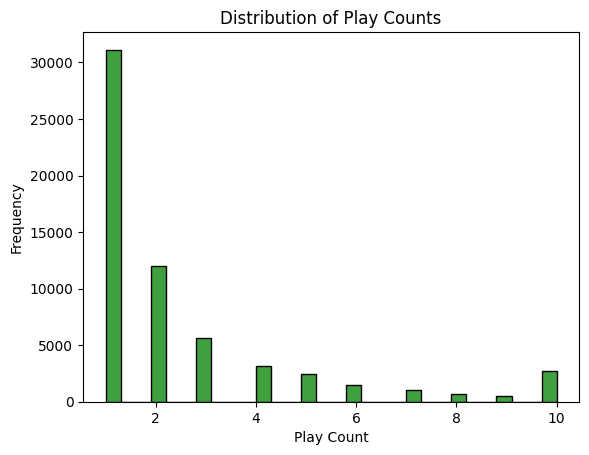

In [91]:
# Histogram of play counts
sns.histplot(data=df_final, x='play_count', bins=30, color='green')
plt.title('Distribution of Play Counts')
plt.xlabel('Play Count')
plt.ylabel('Frequency')
plt.show()

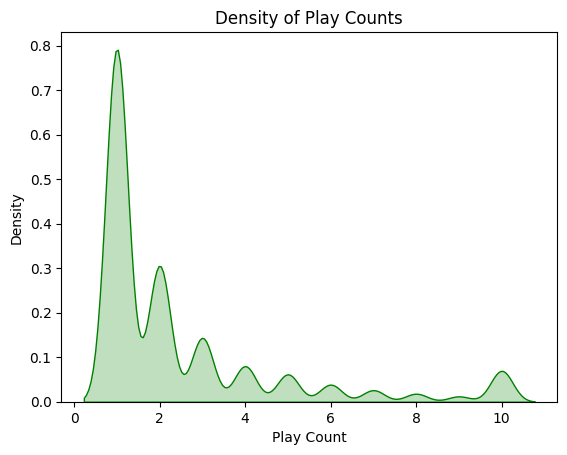

In [92]:
# Visualize density of play counts
sns.kdeplot(data=df_final, x='play_count', shade=True, color='green')
plt.title('Density of Play Counts')
plt.xlabel('Play Count')
plt.ylabel('Density')
plt.show()

**Observations:**
- Most users are interacting with songs at a frequency of 1 playcount, meaning our user play_count data is right-skewed.

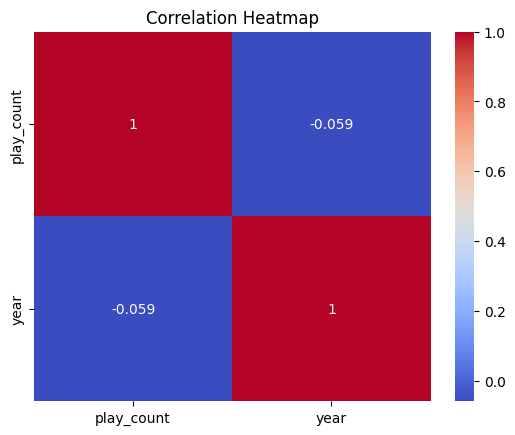

In [93]:
corr = df_final[['play_count', 'year', 'title']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

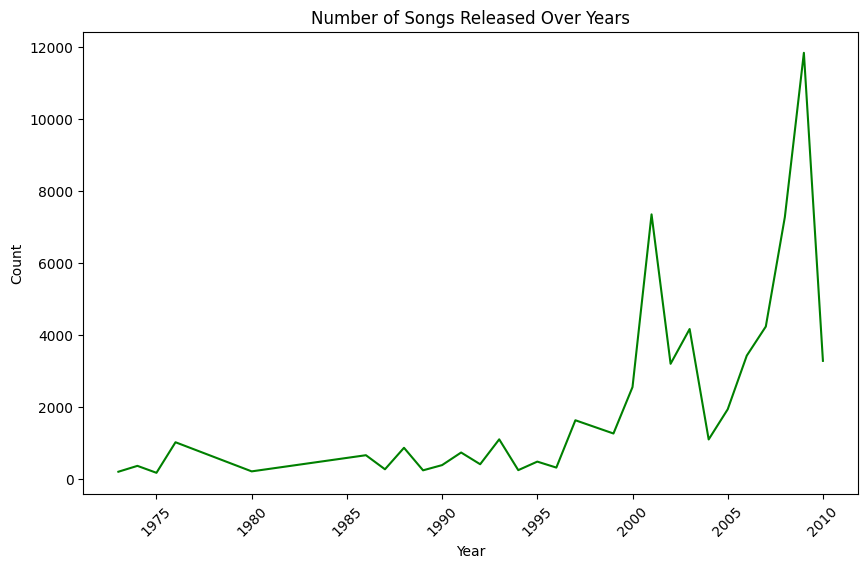

In [243]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_final, x='year', y='song_id', estimator='count', ci=None, color='green')
plt.title('Number of Songs Released Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [95]:
# Aggregate play counts by artist_name
songs_per_yr_sorted = df_final.groupby(['title', 'year'], as_index=False)['play_count'].sum().sort_values(by='play_count', ascending=False).head(20)
songs_per_yr_sorted

,title,year,play_count
49,Dog Days Are Over (Radio Edit),2009,2476
236,Undo,2001,2124
186,Sehr kosmisch,2003,2120
185,Secrets,2009,2043
177,Revelry,2008,2032
260,You're The One,1990,1892
35,Canada,1997,1865
97,Horn Concerto No. 4 in E flat K495: II. Romanc...,2001,1513
241,Use Somebody,2008,1463
69,Fireflies,2009,1414


In [96]:
# Aggregate total play counts by 'year'
songs_played_per_yr = df_final.groupby('year')['play_count'].sum().reset_index()

In [97]:
songs_played_per_yr['year'] = songs_played_per_yr['year'].dropna().apply(lambda x: int(x))
songs_played_per_yr_df = songs_played_per_yr.sort_values(by='play_count', ascending=False)
songs_played_per_yr_df.head()

,year,play_count
27,2009,29125
19,2001,18678
26,2008,17336
21,2003,9788
25,2007,9115


In [98]:
def custom_barplot(data, x, y, perc=True, palette='dark', fontsize=15, rotation=0, title='Custom', sort_by_y=False, xlabel='', ylabel=''):
    """
    Custom a bar plot with optional percentage labels.

    Parameters:
    data (DataFrame): pandas dataframe containing the data to plot.
    x (str): The name of the dataframe column to be used for x-axis labels.
    y (str): The name of the dataframe column to be used for y-axis values.
    perc (bool): If True, display percentages above bars instead of raw counts. Defaults to True.
    palette (str): The color palette for the bars. Defaults to 'dark'.
    fontsize (int): Font size for x and y-axis labels. Defaults to 15.
    rotation (int): Degrees of rotation for the x-axis labels. Defaults to 0.
    title (str): Title for the plot. Defaults to 'Custom'.
    sort_by_y (bool): If True, sort bars by the y values. Defaults to False.
    xlabel (str): Custom label for the x-axis.
    ylabel (str): Custom label for the y-axis.
    """

    plt.figure(figsize=(27, 6))
    plt.xticks(fontsize=fontsize, rotation=rotation)
    plt.xlabel(xlabel if xlabel else x, fontsize=fontsize)  # Use custom x-label if provided
    plt.ylabel(ylabel if ylabel else y, fontsize=fontsize)  # Use custom y-label if provided
    plt.title(title, fontsize=fontsize)
    plt.tight_layout()

    if sort_by_y:
        data = data.sort_values(by=y, ascending=False)

    ax = sns.barplot(data=data, x=x, y=y, palette=palette)

    total = data[y].sum() if perc else None

    for p in ax.patches:
        height = p.get_height()
        label = '{:.1f}%'.format(100 * height / total) if perc else '{:,}'.format(int(height))
        ax.annotate(label, (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='center', fontsize=12, xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

In [99]:
top_20_years = songs_played_per_yr_df.sort_values(by='play_count', ascending=False).head(20)

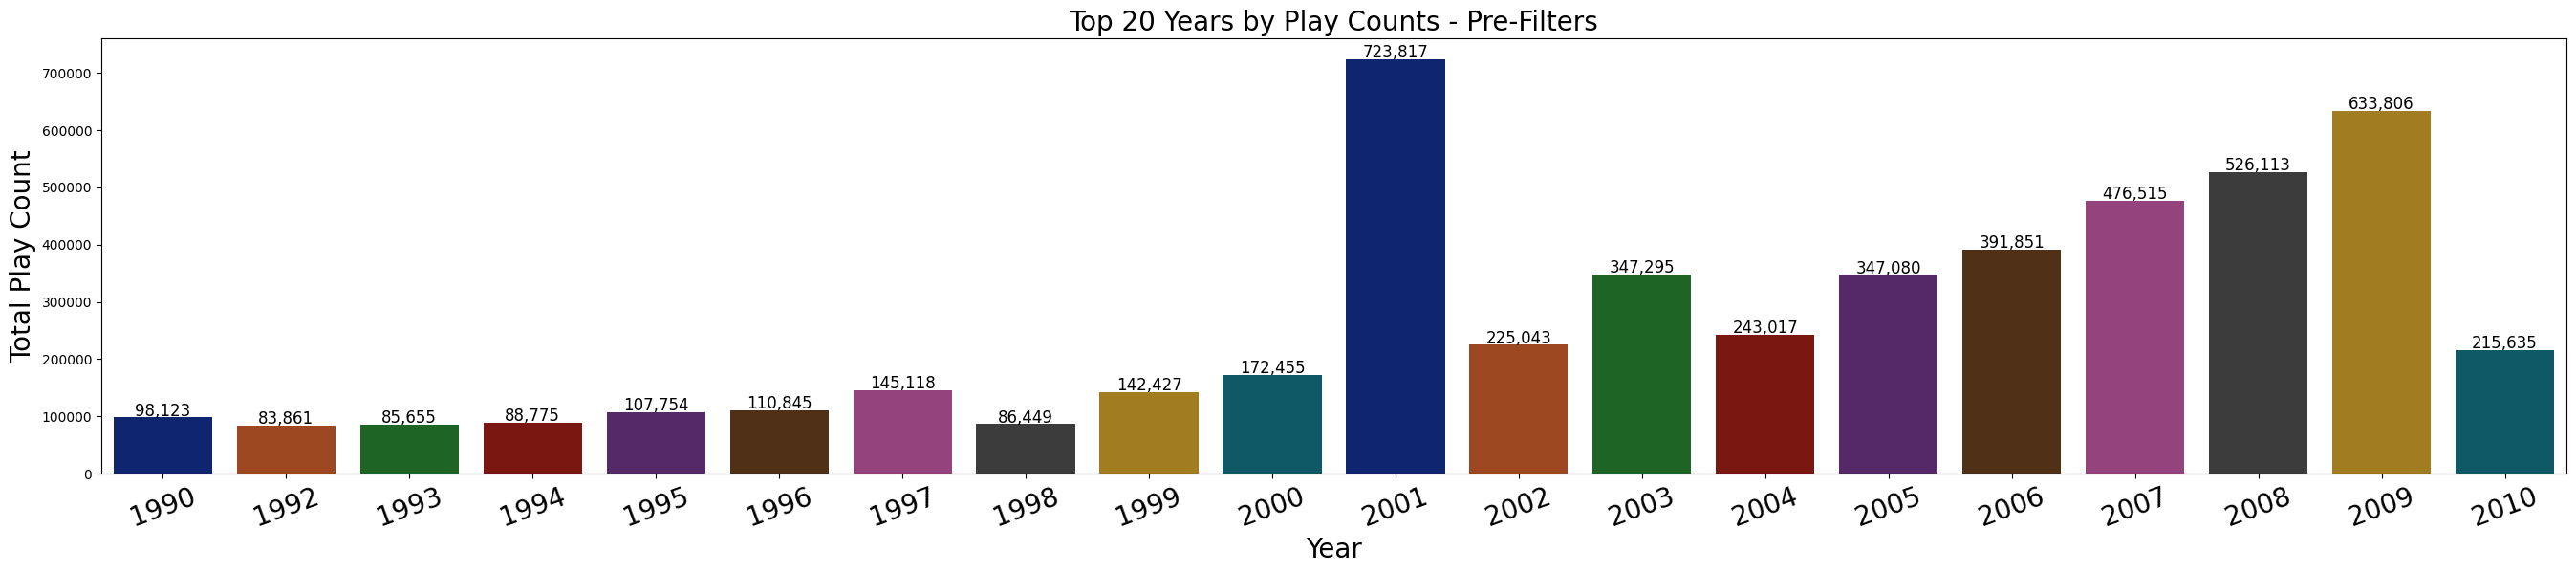

In [100]:
custom_barplot(pre_filter_top_20_years_sorted, 'year', 'play_count', perc=False, title='Top 20 Years by Play Counts - Pre-Filters', fontsize=20, rotation=20, xlabel='Year', ylabel='Total Play Count')

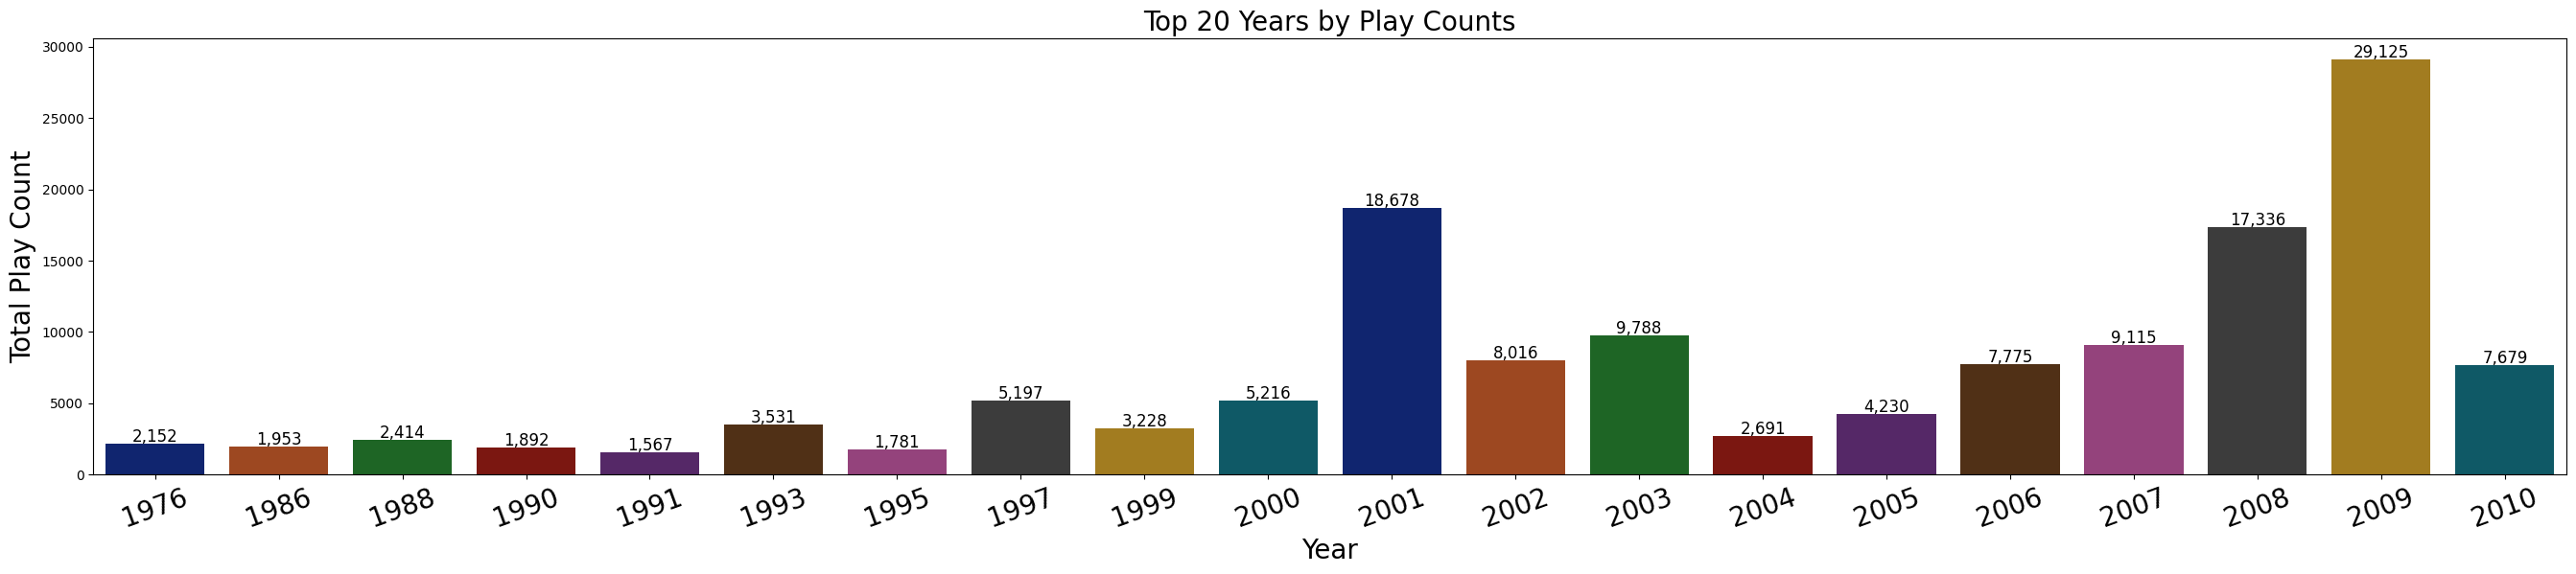

In [101]:
# Plot top 20 years in terms of play counts
custom_barplot(top_20_years, 'year', 'play_count', perc=False, title='Top 20 Years by Play Counts', fontsize=20, rotation=20, xlabel='Year', ylabel='Total Play Count')

In [102]:
artist_play_counts = df_final.groupby('artist_name')['play_count'].sum().sort_values(ascending=False)
artist_play_counts_top10 = artist_play_counts.head(10)
artist_play_counts_top10_df = artist_play_counts_top10.reset_index(name='play_count')

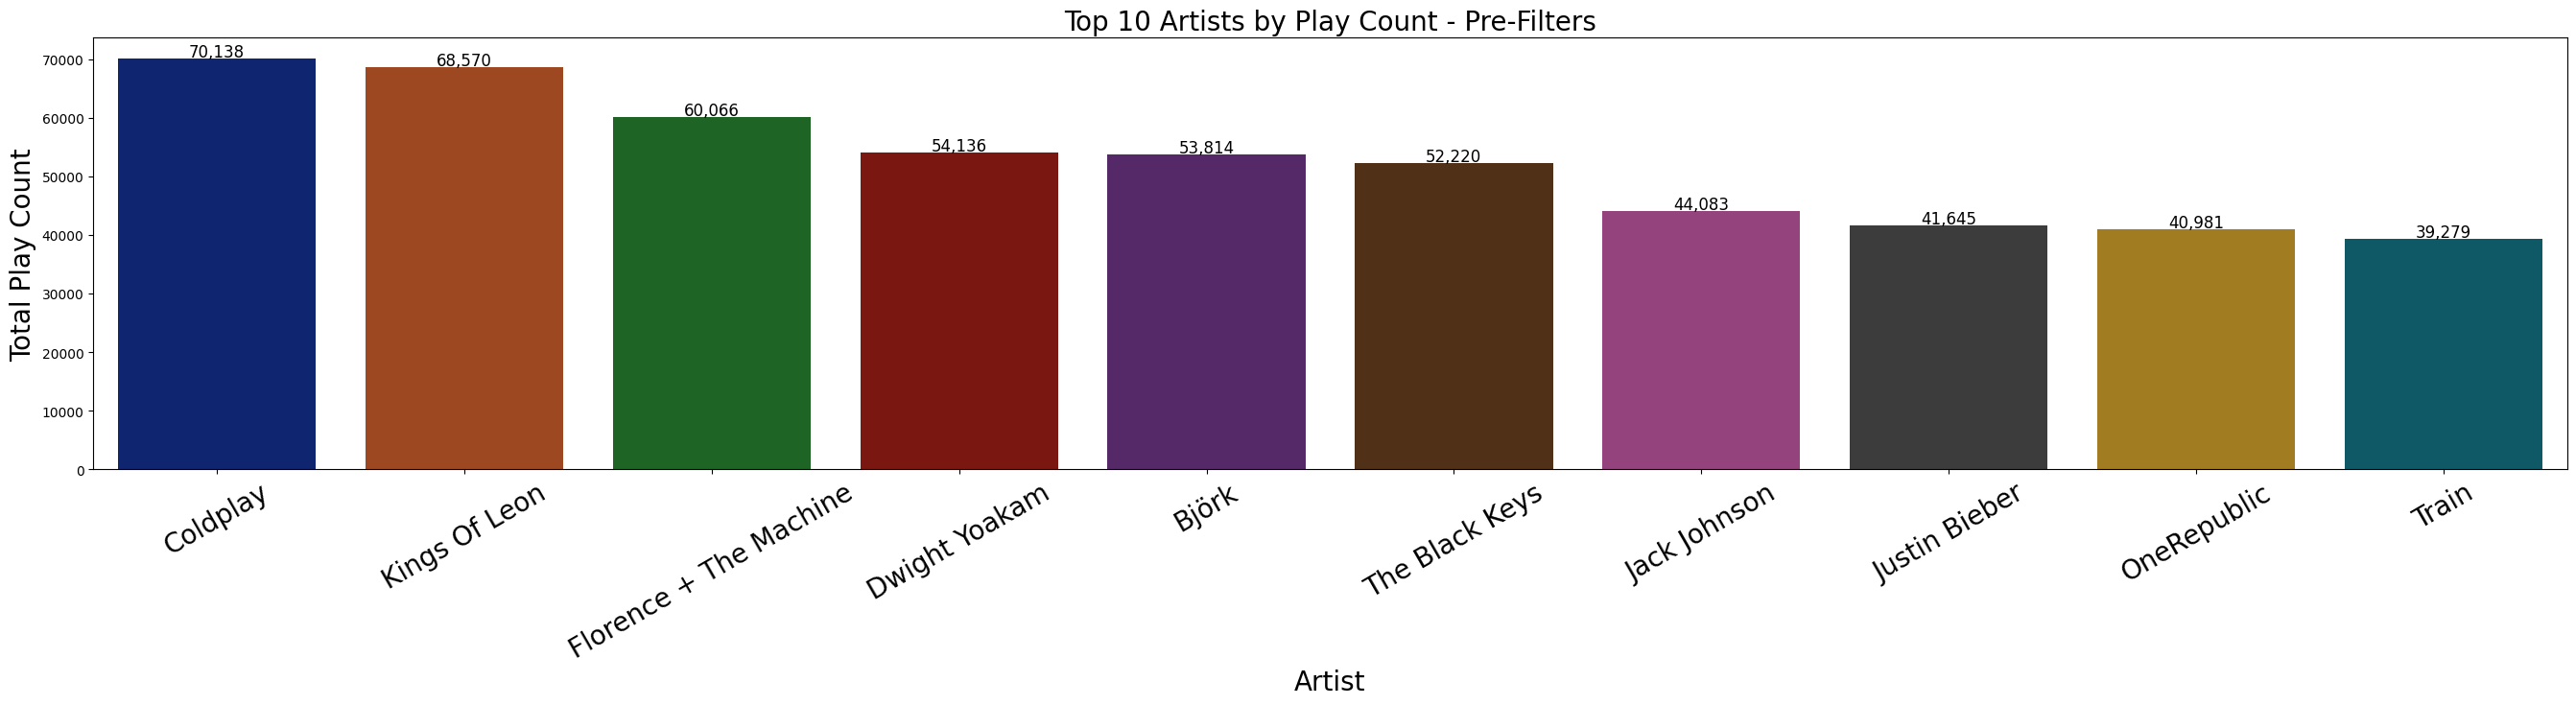

In [103]:
# Top 10 artists pre-filter
custom_barplot(pre_filter_top_10_artists_sorted, 'artist_name', 'play_count', perc=False, title='Top 10 Artists by Play Count - Pre-Filters', fontsize=20, rotation=30, xlabel='Artist', ylabel='Total Play Count')

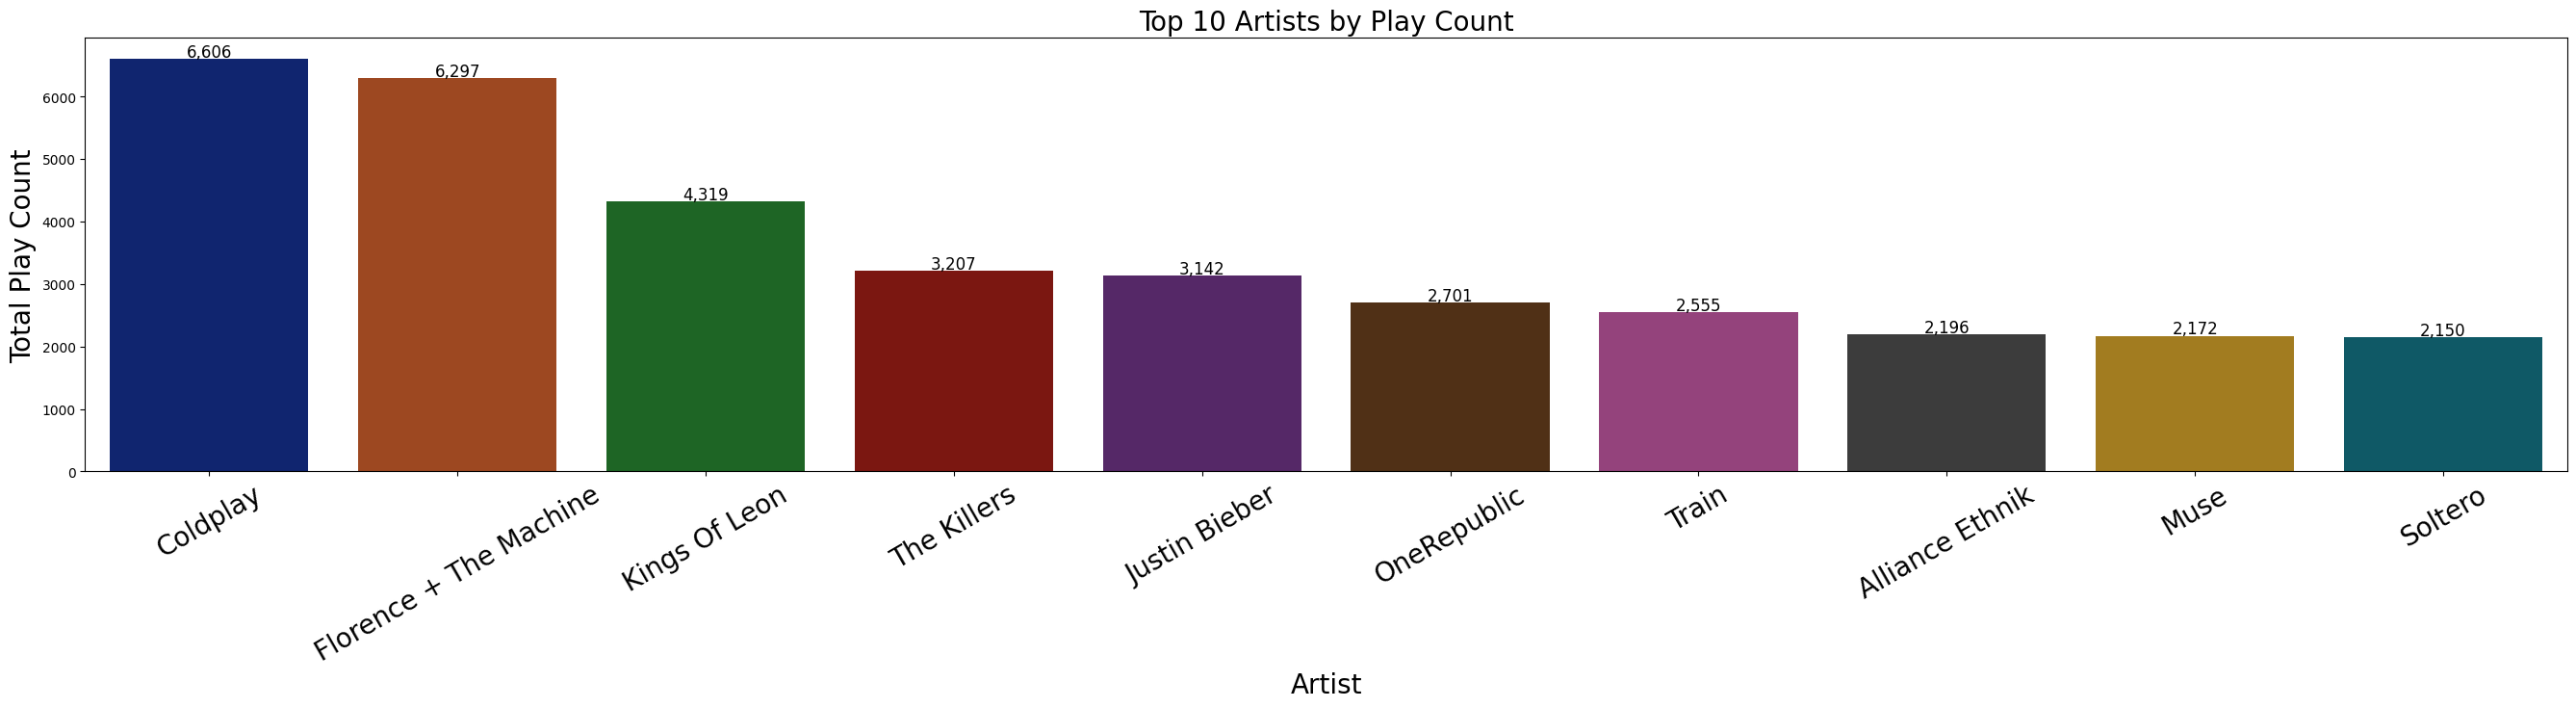

In [104]:
# Top 10 artists post-filter
custom_barplot(artist_play_counts_top10_df, 'artist_name', 'play_count', perc=False, title='Top 10 Artists by Play Count', fontsize=20, rotation=30, xlabel='Artist', ylabel='Total Play Count')

In [105]:
Q1 = df_final['play_count'].quantile(0.25)
Q3 = df_final['play_count'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as being outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
outliers = df_final[(df_final['play_count'] < (Q1 - 1.5 * IQR)) | (df_final['play_count'] > (Q3 + 1.5 * IQR))]
outliers

,play_count,title,release,artist_name,year,user_id,song_id
356,10,Rorol,Identification Parade,Octopus Project,2002,27018,198
409,10,Neon Knights,The Looks,MSTRKRFT,2006,27018,1472
456,10,Kut-Off,Skream!,Skream,2006,27018,2747
467,10,Marshall Examines His Carcass,Identification Parade,Octopus Project,2002,27018,3003
472,10,Waters Of Nazareth (album version),Justice,Justice,2008,27018,3168
...,...,...,...,...,...,...,...
1995036,10,Dog Days Are Over (Radio Edit),Now That's What I Call Music! 75,Florence + The Machine,2009,9570,352
1998523,10,Help I'm Alive,Fantasies,Metric,2009,71830,1787
1998590,10,Almaz,Every Kind Of Mood,Randy Crawford,1986,71830,6222
1999373,10,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,47786,703


**Observations**:
- The data for play_count per year is skewed to the left, meaning the more recent release years seem to have been the most popular in terms of listens. That said, there's a dip that occurs at 2010.
- Once we instated cutoffs, the most popular year in terms of play count totals is 2009, followed by 2001 and 2008.
- We have outliers in terms of play counts, which may skew the data in the direction of these songs/artists/releases. We'll continue our analysis, but placing constraints on the total play counts overall and not just per user may need to be revisited depending on how the models perform.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

## Building various models

### **Popularity-Based Recommendation System**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [106]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()

In [107]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq}).reset_index()

# Let us see the first five records of the final_play dataset
print(final_play.head())

   song_id  avg_count  play_freq
0       21   1.925532        188
1       52   2.220497        322
2       97   2.003559        281
3      145   2.288136        177
4      154   1.993485        307


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [108]:
def recommend_top_songs(final_play_df, n=10, minimum_play=None):
    """
    Recommends the top N songs based on average play count.

    Parameters:
    final_play_df: DataFrame with song IDs, average play counts, and play frequencies.
    n: Number of top songs to recommend.
    min_play_freq: Minimum play frequency for a song to be considered.

    Returns:
    DataFrame of top N recommended songs.
    """
    # Filter songs by minimum play frequency if specified
    if minimum_play:
        filtered_df = final_play_df[final_play_df['play_freq'] >= minimum_play]
    else:
        filtered_df = final_play_df

    # Sort by average count and select top N
    recommendations = filtered_df.sort_values(by='avg_count', ascending=False).head(n)

    return recommendations

In [109]:
# Joining final_play with df_final to get song details for recommendations
final_play_details = final_play.merge(df_final[['song_id', 'title', 'artist_name']].drop_duplicates(), on='song_id')

In [110]:
# Recommend top 10 songs
top_10_songs = recommend_top_songs(final_play_details, n=10, minimum_play=100)
print("Top 10 Recommended Songs Based on Average Play Count:")
top_10_songs[['title', 'artist_name', 'avg_count', 'play_freq']]

Top 10 Recommended Songs Based on Average Play Count:


,title,artist_name,avg_count,play_freq
17,You're The One,Dwight Yoakam,5.005291,378
11,Undo,Björk,4.894009,434
163,Canada,Five Iron Frenzy,4.593596,406
261,Greece 2000,Three Drives,4.513514,148
47,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,4.347701,348
206,Invalid,Tub Ring,4.346304,257
174,Mercy:The Laundromat,Pavement,4.260116,173
186,Revelry,Kings Of Leon,4.259958,477
161,Almaz,Randy Crawford,4.117318,179
144,Secrets,OneRepublic,3.990234,512


In [111]:
# Recommend top 10 songs with higher play frequency
top_10_songs_v2 = recommend_top_songs(final_play_details, n=10, minimum_play=300)
print("Top 10 Recommended Songs Based on Average Play Count:")
top_10_songs_v2[['title', 'artist_name', 'avg_count', 'play_freq']]

Top 10 Recommended Songs Based on Average Play Count:


,title,artist_name,avg_count,play_freq
17,You're The One,Dwight Yoakam,5.005291,378
11,Undo,Björk,4.894009,434
163,Canada,Five Iron Frenzy,4.593596,406
47,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,4.347701,348
186,Revelry,Kings Of Leon,4.259958,477
144,Secrets,OneRepublic,3.990234,512
12,Dog Days Are Over (Radio Edit),Florence + The Machine,3.917722,632
84,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon,3.783607,305
64,Sehr kosmisch,Harmonia,3.693380,574
38,Hey_ Soul Sister,Train,3.144796,442


In [112]:
# Recommend top 10 songs with lower play frequency
top_10_songs_v3 = recommend_top_songs(final_play_details, n=10, minimum_play=50)
top_10_songs_v3[['title', 'artist_name', 'avg_count', 'play_freq']]

,title,artist_name,avg_count,play_freq
17,You're The One,Dwight Yoakam,5.005291,378
11,Undo,Björk,4.894009,434
163,Canada,Five Iron Frenzy,4.593596,406
261,Greece 2000,Three Drives,4.513514,148
47,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,4.347701,348
206,Invalid,Tub Ring,4.346304,257
174,Mercy:The Laundromat,Pavement,4.260116,173
186,Revelry,Kings Of Leon,4.259958,477
161,Almaz,Randy Crawford,4.117318,179
144,Secrets,OneRepublic,3.990234,512


**Observations:**

- **avg_count** gives insight into the intensity of interest in a song among its listeners. A higher avg_count suggests that when users listen to this song, they tend to play it multiple times, which might indicate stronger preference.

- **play_freq** reflects the breadth of interest or overall popularity of a song across the user base. A high play_freq indicates that a song is widely listened to across many users, making it broadly popular. Keep in mind we have a 10 playcount cutoff per user, so that changes how some of these calculations take place.

When recommending songs based on avg_count, you're favoring songs that might not be the most widely played across all users (play_freq) but are highly valued by those who do listen to them. This can help surface songs that best resonate with their audience, potentially leading to more insightful recommendations.


In [113]:
# Double checking that df_final hasn't been altered before moving ahead
df_final.sort_values(by='play_count', ascending=False).head()

,play_count,title,release,artist_name,year,user_id,song_id
1625222,10,Greece 2000,Greece 2000,Three Drives,1997,3237,9942
1667179,10,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993,36965,6860
1661779,10,Ain't Misbehavin,Summertime,Sam Cooke,1989,75805,8252
384226,10,Mockingbird,R&B 2006,Eminem,2004,15733,3165
384239,10,Fuck Kitty,Frumpie One-Piece,Frumpies,1993,15733,3564


### **User User Similarity-Based Collaborative Filtering**

In [114]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

We'll use the below function to calculate precision@k and recall@k, RMSE, and F1_Score@k to better evaluate the model performance.

In [115]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [116]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 10))

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

In [117]:
# Build the user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True
}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_user_user, k=10)

RMSE: 2.2606
Precision:  0.492
Recall:  0.731
F_1 score:  0.588


**Observations**:

**Baseline Model Performance**:

- RMSE: 2.2606
- Precision:  0.492
- Recall:  0.731
- F_1 score:  0.588

RMSE is appearing fairly high, but since our interaction counts are constrained to a cap of 10 per user, this isn't a terrible starting place. On average, the model's play counts are roughly ~2.26 away from actual play counts. That said, if someone plays a song more tha 7 times as an example, that's a pretty strong indicator that they like it. It wouldn't matter if it's played 9 times or 5 times; both mean that there's a preference there. In other words, this RMSE has to be considered in the context of the project and the dataset we're working with.

Precision indicates that about 49.2% of the recommended items are relevant to the users. Given the complexities of human preferences in music and the inherent challenge of capturing nuances with play counts, this precision isn't a bad starting point. However, there's certainly room for improvement. We'll aim to make the recommendations more relevant to individual users.

Recall has a strong starting point, indicating that it successfully identifies 73.1% of all relevant items. High recall is particularly important in a recommendation system as it suggests the model is capable of capturing a broad set of items that are of interest to the users. This is promising based on the baseline.

Based on the F_1 score, thre's a moderate balance between precision and recall. A score of 0.588 suggests that the model has a reasonable balance between identifying relevant items and ensuring the recommendations are relevant.

Overall, all of these metrics could stand to be improved, but let's see how effectively the model can predict play count interactions.


In [118]:
user_id = 3237  # UserID
song_id = 8252  # SongID "Ain't Misbehavin'" by Sam Cooke

# Filter and sum play counts
total_plays = df_final[(df_final['user_id'] == user_id) & (df_final['song_id'] == song_id)]['play_count'].sum()

print(f"User {user_id} has listened to song {song_id} a total of {total_plays} times.")

User 3237 has listened to song 8252 a total of 10 times.


In [119]:
# Predicting play_count for a sample user for a song they played 5 times
sim_user_user.predict(3237, 8252, r_ui = 10, verbose = True)

user: 3237       item: 8252       r_ui = 10.00   est = 4.41   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=3237, iid=8252, r_ui=10, est=4.405168241076466, details={'actual_k': 40, 'was_impossible': False})

In [120]:
user_id = 3237  # UserID
song_id = 5375  # SongID "I Kissed a Girl" by Katy Perry

total_plays = df_final[(df_final['user_id'] == user_id) & (df_final['song_id'] == song_id)]['play_count'].sum()

print(f"User {user_id} has listened to song {song_id} ('I Kissed a Girl' by Katy Perry) a total of {total_plays} times.")

User 3237 has listened to song 5375 ('I Kissed a Girl' by Katy Perry) a total of 5 times.


In [121]:
# Predicting play_count for a sample user with song they played 5 times
sim_user_user.predict(3237, 5375, r_ui=5, verbose = True)

user: 3237       item: 5375       r_ui = 5.00   est = 1.93   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=3237, iid=5375, r_ui=5, est=1.925262590004659, details={'actual_k': 40, 'was_impossible': False})

In [122]:
# Identify songs not interacted with by user 3237
user_interacted_songs = set(df_final[df_final['user_id'] == 3237]['song_id'])
all_songs = set(df_final['song_id'])
non_interacted_songs = all_songs - user_interacted_songs

# Selecting a non-interacted song ID
sample_song_id = next(iter(non_interacted_songs))

# Fetching the corresponding title and artist name for this song ID from df_final
song_details = df_final[df_final['song_id'] == sample_song_id][['title', 'artist_name']].drop_duplicates().iloc[0]
print(f"Sample non-interacted song ID for user 3237: {sample_song_id}")
print(f"Title: {song_details['title']}, Artist: {song_details['artist_name']}")

Sample non-interacted song ID for user 3237: 512
Title: The Ballad of Michael Valentine, Artist: The Killers


In [123]:
# Predicting play_count for a sample user with song they didn't listen to
sim_user_user.predict(3237, 512, r_ui=None, verbose = True)

user: 3237       item: 512        r_ui = None   est = 1.48   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=3237, iid=512, r_ui=None, est=1.4831766876850903, details={'actual_k': 40, 'was_impossible': False})

**Observations**:

- The baseline model is not performing well based on the above predictions, but it doesn't mean there's no value in the above. We have to consider the context of the problem, and if our model predicts that someone will listen to a song 5 times when in reality they listened it to 10 times, we can still infer preference for that song. Frankly, if someone plays a song *more than once*, we can even infer preference. Let's try predictions for a different user to see if we're getting similar results.


In [124]:
user_id2 = 62759  # UserID
song_id2 = 7416  # SongID "Revelry" by Kings of Leon

total_plays = df_final[(df_final['user_id'] == user_id2) & (df_final['song_id'] == song_id2)]['play_count'].sum()

print(f"User {user_id2} has listened to song {song_id2} ('Revelry' by Kings of Leon) a total of {total_plays} times.")

User 62759 has listened to song 7416 ('Revelry' by Kings of Leon) a total of 10 times.


In [125]:
# Predicting play_count for a sample user with a song they interacted with 10 times
sim_user_user.predict(62759, 7416, r_ui = 10, verbose = True) # #predict play_count for any sample user

user: 62759      item: 7416       r_ui = 10.00   est = 5.74   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=62759, iid=7416, r_ui=10, est=5.73838958790259, details={'actual_k': 40, 'was_impossible': False})

In [126]:
user_id2 = 62759  # UserID
song_id2 = 6270  # SongID "Harder, Better, Faster, Stronger" by Daft Punk

total_plays = df_final[(df_final['user_id'] == user_id2) & (df_final['song_id'] == song_id2)]['play_count'].sum()

print(f"User {user_id2} has listened to song {song_id2} ('Harder, Better, Faster, Stronger' by Daft Punk) a total of {total_plays} times.")

User 62759 has listened to song 6270 ('Harder, Better, Faster, Stronger' by Daft Punk) a total of 5 times.


In [127]:
# Predicting play_count for a sample user with a song they interacted with 5 times
sim_user_user.predict(62759, 6270, r_ui = 5, verbose = True) # #predict play_count for any sample user

user: 62759      item: 6270       r_ui = 5.00   est = 1.88   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=62759, iid=6270, r_ui=5, est=1.883261514896257, details={'actual_k': 40, 'was_impossible': False})

In [128]:
# Identify songs not interacted with by user 62759
user_id = 62759

user_interacted_songs = set(df_final[df_final['user_id'] == user_id]['song_id'])
all_songs = set(df_final['song_id'])
non_interacted_songs = all_songs - user_interacted_songs

# Selecting a non-interacted song ID
sample_song_id = next(iter(non_interacted_songs))

# Fetching the corresponding title and artist name for this song ID
song_details = df_final[df_final['song_id'] == sample_song_id][['title', 'artist_name']].drop_duplicates().iloc[0]

print(f"Sample non-interacted song ID for user {user_id}: {sample_song_id}")
print(f"Title: {song_details['title']}, Artist: {song_details['artist_name']}")

Sample non-interacted song ID for user 62759: 512
Title: The Ballad of Michael Valentine, Artist: The Killers


In [129]:
# Predicting play_count for a sample user with song they didn't listen to
sim_user_user.predict(62759, 512, r_ui=None, verbose = True)

user: 62759      item: 512        r_ui = None   est = 1.73   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=62759, iid=512, r_ui=None, est=1.7286642087812625, details={'actual_k': 40, 'was_impossible': False})

**Observations**:
- The model is performing pretty poorly for the above predictions for user 62759 as well. As of yet, we can't trust these predictions with a high level of confidence. Let's go ahead and start tuning the model to see if we can get these predictions in a healthier place.

In [130]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1) # optimizing rmse, -1 to use all threads

# Fitting the data
gs.fit(data)

# Best RMSE score
gs.best_score['rmse']

2.112981358665447

In [131]:
6# Combination of parameters that gave the best RMSE score
gs.best_params['rmse']

{'k': 30,
 'min_k': 9,
 'sim_options': {'name': 'pearson_baseline',
  'user_based': True,
  'min_support': 2}}

In [132]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {
    'name' : 'pearson_baseline',
    'user_based' : True,
    'min_support': 2
}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(k=30, min_k=9, sim_options=sim_options)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_user_user_optimized, k=10)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.1396
Precision:  0.506
Recall:  0.719
F_1 score:  0.594


**Observations**:

**Baseline Model Performance**:

- RMSE: 2.2613
- Precision: 0.492
- Recall: 0.731
- F_1 score: 0.588

**Post-Tuning Model Performance**:

- RMSE: 2.1396
- Precision:  0.506
- Recall:  0.719
- F_1 score:  0.594

The decrease from 2.2613 to 2.1396 is a positive development for RMSE. This metric measures the average magnitude of the prediction errors, so a lower RMSE value indicates we're getting more accurate. Considering the play count interactions are scaled from 1 to 10, this improvement is meaningful, but the RMSE values are still relatively high...
    
The increase in precision from 0.492 to 0.506 suggests that the proportion of relevant items recommended by the model has increased. This improvement means that after tuning, your model is more accurately recommending items that users are actually interested in. It's important to keep working on getting this precision up, especially for recommender systems.

The slight decrease in recall from 0.731 to 0.719 indicates a minor reduction in the model's ability to identify all relevant items from the dataset. However, this small decrease in recall is not necessarily negative when considered alongside the increase in precision.

The advancement in the F_1 score shows improved relationship between precision and recall.

In [133]:
# Predict the play count for the same songs we've previously looked at for baseline model
sim_user_user_optimized.predict(3237, 5375, r_ui=10, verbose=True)

user: 3237       item: 5375       r_ui = 10.00   est = 3.40   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=3237, iid=5375, r_ui=10, est=3.401679160395578, details={'actual_k': 30, 'was_impossible': False})

In [134]:
sim_user_user_optimized.predict(3237, 8252, r_ui=5, verbose=True)

user: 3237       item: 8252       r_ui = 5.00   est = 6.19   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=3237, iid=8252, r_ui=5, est=6.192856738862347, details={'actual_k': 30, 'was_impossible': False})

In [135]:
sim_user_user_optimized.predict(3237, 512, r_ui=None, verbose=True)

user: 3237       item: 512        r_ui = None   est = 1.76   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=3237, iid=512, r_ui=None, est=1.763628454869751, details={'actual_k': 30, 'was_impossible': False})

In [136]:
sim_user_user_optimized.predict(62759, 7416, r_ui=10, verbose=True)

user: 62759      item: 7416       r_ui = 10.00   est = 8.00   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=62759, iid=7416, r_ui=10, est=8.00355281362635, details={'actual_k': 30, 'was_impossible': False})

In [137]:
sim_user_user_optimized.predict(62759, 6270, r_ui=5, verbose=True)

user: 62759      item: 6270       r_ui = 5.00   est = 2.62   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=62759, iid=6270, r_ui=5, est=2.619322993726479, details={'actual_k': 30, 'was_impossible': False})

**Observations**:

- We're seeing varying levels of accuracy from the above predictions; we have one very close prediction for user 3237 who interacted with song 5375 5 times, and the estimation is 6.19. Similarly, 62759 interacted with 7416 10 times, and the prediction we received is pretty close at 8. However, the predictions are not consistently accurate. This makes it difficult to trust the model.

Let's try to keep fine-tuning to see if we can get these performance metrics into a healthier place; right now we are not seeing ideal performance. RMSE is too high, and precision could certainly still be improved.

In [138]:
# Setting up parameter grid to tune the hyperparameters
param_grid_fine_tune = {'k': [35, 36, 37],
              'min_k': [11, 12, 13],
              'sim_options': {'name': ['pearson_baseline'],
                              'user_based': [True],
                              "min_support": [0.25, 0.5, 0.75]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs_fine_tune = GridSearchCV(KNNBasic, param_grid_fine_tune, measures=['rmse'], cv=3, n_jobs=-1) # optimizing rmse, -1 to use all threads

# Fitting the data
gs_fine_tune.fit(data)

# Best RMSE score
gs_fine_tune.best_score['rmse']

2.1065105217555242

In [139]:
# Combination of parameters that gave the best RMSE score
gs_fine_tune.best_params['rmse']

{'k': 36,
 'min_k': 13,
 'sim_options': {'name': 'pearson_baseline',
  'user_based': True,
  'min_support': 0.25}}

In [140]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {
    'name' : 'pearson_baseline',
    'user_based' : True,
    'min_support': 0.25
}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized_2 = KNNBasic(k=37, min_k=13, sim_options=sim_options)

# Training the algorithm on the trainset
sim_user_user_optimized_2.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_user_user_optimized_2, k=10)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.1391
Precision:  0.506
Recall:  0.725
F_1 score:  0.596


Let's also take a look at the 5 nearest neighbors (most similar) to a certain user. We'll use one of the IDs we've already done some predictions on. Note that we'll need to convert the raw user_id to the surpise index IDs for this to populate correctly.

In [141]:
inner_user_id = trainset.to_inner_uid(62759)
inner_user_id

72

In [142]:
sim_user_user_optimized_2.get_neighbors(72 ,k=5)

[489, 277, 324, 182, 239]

In [143]:
# Function to convert surprise inner IDs to raw user IDs
def get_raw_user_ids(inner_ids, trainset):
    raw_user_ids = [trainset.to_raw_uid(inner_id) for inner_id in inner_ids]
    return raw_user_ids

inner_ids = [489, 277, 324, 182, 239]
raw_user_ids = get_raw_user_ids(inner_ids, trainset)
print(raw_user_ids)

[63210, 24803, 36015, 37466, 3237]


**Observations**;
- Above we see the model has determined these user_ids correspond with the 5 nearest neighbors to user 6958.

User IDs = 63210, 24803, 36015, 37466, 3237

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [144]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not visited yet
    non_interacted_items = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_interacted_items:

        # Predicting the play_count for those non visited song ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted interaction
        recommendations.append((song_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # Returing top n highest predicted songs/titles for this user

In [145]:
# Make top 5 recommendations
recommendations = get_recommendations(df_final, 62759, 5, sim_user_user_optimized_2)
recommendations

[(6222, 5.411714904745435),
 (7913, 4.862560760798844),
 (617, 4.8611050458878085),
 (5645, 4.859243421466076),
 (8252, 4.736061864505555)]

In [146]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
recommendations_df = pd.DataFrame(recommendations, columns=["song_id", "predicted_ratings"])
recommendations_df


,song_id,predicted_ratings
0,6222,5.411715
1,7913,4.862561
2,617,4.861105
3,5645,4.859243
4,8252,4.736062


In [147]:
# Converting the above to a dataframe for ease of reference
song_ids = [6222, 7913, 617, 5645, 8252]
song_details = pd.DataFrame()

for song_id in song_ids:
    song_detail = df_final[df_final['song_id'] == song_id].drop(columns=['user_id', 'play_count']).drop_duplicates().iloc[0]
    song_details = song_details.append(song_detail, ignore_index=True)

song_details

,title,release,artist_name,year,song_id
0,Almaz,Every Kind Of Mood,Randy Crawford,1986,6222
1,Invalid,Fermi Paradox,Tub Ring,2002,7913
2,Sincerité Et Jalousie,Simple Et Funky,Alliance Ethnik,1995,617
3,Représente,Fat Come Back,Alliance Ethnik,1999,5645
4,Ain't Misbehavin,Summertime,Sam Cooke,1989,8252


**Observations**:

- Even though none of these recommendations exceed ~5 play counts, it doesn't mean these are inaccurate predictions. The model is predicting modestly, but if we consider the context of the problem we're solving...most people do not listen to a song 5 times or more without greatly enjoying that song. These are still useful recommendations even if they aren't showing 10 interactions.

### Correcting the play_counts and Ranking the above songs

In [148]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values(by='corrected_ratings', ascending=False)
  return ranked_songs

In [149]:
print(final_play.head())

   song_id  avg_count  play_freq
0       21   1.925532        188
1       52   2.220497        322
2       97   2.003559        281
3      145   2.288136        177
4      154   1.993485        307


In [150]:
def ranking_songs(recommendations, final_play):
    # recommendations is a list of tuples (song_id, predicted_rating)

    # Convert recommendations to a DataFrame for easier merging
    rec_df = pd.DataFrame(recommendations, columns=["song_id", "predicted_ratings"])

    # Merge final_play with recommendations to include 'avg_count' and 'play_freq'
    ranked_songs = pd.merge(final_play, rec_df, on="song_id", how="inner")

    # Calculate corrected ratings based on play_freq and predicted ratings
    ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

    # Sort songs based on corrected play counts
    ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)

    # Return the top ranked songs based on corrected ratings
    return ranked_songs

In [151]:
ranked_recommendations = ranking_songs(recommendations, final_play)
print(ranked_recommendations)

   song_id  avg_count  play_freq  predicted_ratings  corrected_ratings
2     6222   4.117318        179           5.411715           5.336971
0      617   3.894366        284           4.861105           4.801766
3     7913   4.346304        257           4.862561           4.800182
1     5645   3.978102        274           4.859243           4.798831
4     8252   3.909871        233           4.736062           4.670550


**Observations**:

- Based on the above, we see corrected ratings which consider how frequently each song has been interacted with by users, providing a much more nuanced recommendation. This essentially balances popularity against personalization of predictions.

- The higher the corrected rating, the more the model believes the user will like the song. This list could be used to recommend songs to the user, with song 6222 and song 617 appearing to be the top recommendations based on the corrected ratings.

- We can see that song 7913 has the highest average play count, which indicates it's quite popular among all users. However, its corrected rating places it third in the recommendation list.


- Although we saw some improvement in our model performance metrics after tuning the hyperparameters, there's still room for improvement across all of these metrics. Our predictions were fairly accurate for a few examples, but in some instances they were pretty far off from r_ui.

#### **User User Similarity-Based Collaborative Filtering - Overall Performance:**

**Baseline Model Performance:**

- RMSE: 2.2613
- Precision: 0.492
- Recall: 0.731
- F_1 score: 0.588

**Post-Tuning Model Performance:**

- RMSE: 2.1396
- Precision: 0.506
- Recall: 0.719
- F_1 score: 0.594

**Fine-Tuned Model Performance**

- RMSE: 2.1391
- Precision:  0.506
- Recall:  0.725
- F_1 score:  0.596


Based on the above, any tuning did improve against the baseline. These metrics suggest the model has a solid foundation but highlight the inherent challenge in balancing precision and recall, especially when working with a broad range of user preferences and interactions.

Given the constraints and the data's nature, the observed improvements post-tuning are promising. However, aiming for further enhancements in precision without significantly impacting recall could provide a more satisfying user experience.

Considering the complexity of user preferences and behaviors, these metrics are acceptable but underscore the need for ongoing optimization and exploration of additional features or methodologies that could enhance recommendation quality.

### Item Item Similarity-based collaborative filtering recommendation systems




In [152]:
# Declaring the similarity options
sim_options = {
    'name': 'cosine',
    'user_based': False # Since this is item-item and not user-user based
}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1)

# Fit the model on the training data
sim_item_item.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [153]:
# Let's compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 2.1588
Precision:  0.409
Recall:  0.701
F_1 score:  0.517


**Observations**:

**Baseline Model Performance**:

- RMSE: 2.1588
- Precision:  0.409
- Recall:  0.701
- F_1 score:  0.517

In terms of RMSE, the baseline model's predictions are roughly ~2.16 play counts away from the actual values. Given that play counts range from 1 to 10, this RMSE indicates moderate level of prediction error.

Precision is notably lower than what was seen in the user-user model. This model might be less effective at identifying songs that users prefer.

Recall is looking solid at 0.701. This is a relatively strong point of the model, suggesting it has a good capability of capturing users' interests. However, the trade-off between recall and precision is evident.

The F_1 score of 0.517 shows that the model has moderate effectiveness in recommending relevant items to users but also highlights the existing trade-off between precision and recall.

Overall, these metrics suggest the item-item similarity-based model might need adjustments to better tailor its recommendations to individual user preferences...

In [154]:
# Predict the play_count by user 3237 for the song_id 8252
sim_item_item.predict(3237, 8252, r_ui=10, verbose=True)

user: 3237       item: 8252       r_ui = 10.00   est = 5.21   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=3237, iid=8252, r_ui=10, est=5.205915262395119, details={'actual_k': 40, 'was_impossible': False})

In [155]:
# Predict the play_count by user 3237 for song_id 5375
sim_item_item.predict(3237, 5375, r_ui=5, verbose=True)

user: 3237       item: 5375       r_ui = 5.00   est = 5.24   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=3237, iid=5375, r_ui=5, est=5.244033142338945, details={'actual_k': 40, 'was_impossible': False})

In [156]:
# Predict the play_count by user 3237 for song_id 512 which they have not interacted with
sim_item_item.predict(3237, 512, r_ui=None, verbose=True)

user: 3237       item: 512        r_ui = None   est = 5.02   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=3237, iid=512, r_ui=None, est=5.022248385402815, details={'actual_k': 40, 'was_impossible': False})

In [157]:
# Predict the play_count by user 62759 for the song_id 7416
sim_item_item.predict(62759, 7416, r_ui=10, verbose=True)

user: 62759      item: 7416       r_ui = 10.00   est = 4.84   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=62759, iid=7416, r_ui=10, est=4.841749918109804, details={'actual_k': 40, 'was_impossible': False})

In [158]:
# Predict the play_count by user 62759 for the song_id 6270
sim_item_item.predict(62759, 6270, r_ui=5, verbose=True)

user: 62759      item: 6270       r_ui = 5.00   est = 3.99   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=62759, iid=6270, r_ui=5, est=3.987315079893992, details={'actual_k': 40, 'was_impossible': False})

In [159]:
# Predict the play_count by user 62759 for the song_id 512
sim_item_item.predict(62759, 512, r_ui=None, verbose=True)

user: 62759      item: 512        r_ui = None   est = 3.65   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=62759, iid=512, r_ui=None, est=3.645529581544872, details={'actual_k': 40, 'was_impossible': False})

**Observations**:

- Baseline model is performing OK but there's plenty of improvement needed across all metrics. We see a solid prediction of 5.24 for item 3237, which is not too far away from the actual interaction of 5.  The predictions are still useful, but we could aim to get closer.

In [160]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
gs.fit(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

In [161]:
# Best RMSE score
print(gs.best_score)

{'rmse': 2.0409094691923717}


In [162]:
# Find the combination of parameters that gave the best RMSE score
print(gs.best_params)

{'rmse': {'k': 20, 'min_k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 4}}}


In [163]:
# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options={
    'name': 'pearson_baseline',
    'user_based': False,
    'min_support': 2  # Specifies the minimum number of common items required
},
k=20,
min_k=6
)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [164]:
# Let's compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 2.0774
Precision:  0.479
Recall:  0.78
F_1 score:  0.594


**Observations**:

**Baseline Model Performance:**

- RMSE: 2.1588
- Precision: 0.409
- Recall: 0.701
- F_1 score: 0.517

**Post-Tuning Model Performance**:

- RMSE: 2.0774
- Precision:  0.479
- Recall:  0.78
- F_1 score:  0.594

RMSE reduction from 2.1588 to 2.0774 indicates a notable improvement in the accuracy of the model's predictions. This is still high, but again, I'm less concerned with this RMSE based on the context of the problem we're solving for.

The increase in precision from 0.409 to 0.479 is substantial. This improvement means that a higher proportion of the songs recommended by the model are relevant to the users.

In terms of recall, 0.701 to 0.78 indicates that the model is now able to identify a greater percentage of relevant songs that users interact with.

F_1 improvement suggests that the model has become more effective overall, achieving a better balance between recommending relevant items and covering a broad range of users' interests.


In [165]:
# Predict the play_count for user 3237 with song_id 8252
sim_item_item_optimized.predict(3237, 8252, r_ui=10, verbose=True)

user: 3237       item: 8252       r_ui = 10.00   est = 7.66   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=3237, iid=8252, r_ui=10, est=7.657040967668138, details={'actual_k': 20, 'was_impossible': False})

In [166]:
# Predicting play count for user 3237 with song_id 5375
sim_item_item_optimized.predict(3237, 5375, r_ui=5, verbose=True)

user: 3237       item: 5375       r_ui = 5.00   est = 5.15   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=3237, iid=5375, r_ui=5, est=5.146348220806815, details={'actual_k': 20, 'was_impossible': False})

In [167]:
# Predicting play count for user 3237 with song_id 512
sim_item_item_optimized.predict(3237, 512, r_ui=None, verbose=True)

user: 3237       item: 512        r_ui = None   est = 4.16   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=3237, iid=512, r_ui=None, est=4.1609027608723546, details={'actual_k': 20, 'was_impossible': False})

In [168]:
# Predict the play_count for user 62759 with song_id 7416
sim_item_item_optimized.predict(62759, 7416, r_ui=10, verbose=True)

user: 62759      item: 7416       r_ui = 10.00   est = 7.06   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=62759, iid=7416, r_ui=10, est=7.06119863299, details={'actual_k': 20, 'was_impossible': False})

In [169]:
# Predict the play_count for user 62759 with song_id 6270
sim_item_item_optimized.predict(62759, 6270, r_ui=5, verbose=True)

user: 62759      item: 6270       r_ui = 5.00   est = 3.86   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=62759, iid=6270, r_ui=5, est=3.8604509686679602, details={'actual_k': 20, 'was_impossible': False})

In [170]:
# Predict the play_count for user 62759 with song_id 512
sim_item_item_optimized.predict(62759, 512, r_ui=None, verbose=True)

user: 62759      item: 512        r_ui = None   est = 2.80   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=62759, iid=512, r_ui=None, est=2.803147568884975, details={'actual_k': 20, 'was_impossible': False})

**Observations**:

- These predictions look pretty good; they aren't perfect, but they do give a good sense of whether someone would like a song or not. Even when play counts are off by roughly 2 in some instances...it's safe to say someone likes a song predicted at 7.06 interactions even if the real count we can reference is 10. This highlights that RMSE interpretation really depends on the parameters of your problem and the data you are working with. There's some level of subjective interpretability depending on what you're predicting.

In [171]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations_item_item = get_recommendations(df_final, 3237, 5, sim_item_item_optimized)
recommendations_item_item

[(1936, 7.192774215974912),
 (892, 7.115213080683814),
 (1262, 6.5673239112806066),
 (3699, 6.354220225585624),
 (198, 6.172008817730072)]

Interestingly, these recommendations have higher interaction potential than the recommendations we saw in the user user model. We didn't see recommendations that were above roughly ~5 for user user, so it seems that this model is more confident in play counts based on the above.

In [172]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
recommendations_item_item_df = pd.DataFrame(recommendations_item_item, columns=["song_id", "predicted_ratings"])
recommendations_item_item_df

,song_id,predicted_ratings
0,1936,7.192774
1,892,7.115213
2,1262,6.567324
3,3699,6.354220
4,198,6.172009


In [173]:
# Converting the above to show full song, release, artist, year, and song id details
song_ids = [1936, 892, 1262, 3699, 198]
song_details = pd.DataFrame()

for song_id in song_ids:
    song_detail = df_final[df_final['song_id'] == song_id].drop(columns=['user_id', 'play_count']).drop_duplicates().iloc[0]
    song_details = song_details.append(song_detail, ignore_index=True)

song_details

,title,release,artist_name,year,song_id
0,Feel The Love,In Ghost Colours,Cut Copy,2008,1936
1,Bleeding Hearts,Hell Train,Soltero,2001,892
2,Lights & Music,Lights & Music,Cut Copy,2008,1262
3,Hypnopaedia,Identification Parade,Octopus Project,2002,3699
4,Rorol,Identification Parade,Octopus Project,2002,198


In [174]:
# Applying the ranking_songs function
ranked_recommendations = ranking_songs(recommendations_item_item, final_play)
print(ranked_recommendations)

   song_id  avg_count  play_freq  predicted_ratings  corrected_ratings
3     1936   2.029412        136           7.192774           7.107025
1      892   1.471429        140           7.115213           7.030698
2     1262   2.647727        176           6.567324           6.491946
4     3699   2.718310        142           6.354220           6.270302
0      198   2.263889        144           6.172009           6.088675


**Observations**:

- The predicted ratings are fairly high, but corrected ratings are slightly more modest.

Overall, the top 5 song recommendations for user **3237** are as follows:

1. "Feel The Love" by Cut Copy
2. "Bleeding Hearts" by Soltero
3. "Lights & Music" by Cut Copy
4. "Hypnopaedia" by Octopus Project
5. "Rorol" by Octopus Project

It would be preferred if these recommendations weren't including the same artists more than once. Although this user may be interested in these artists and songs, we do want diverse recommendations.

#### **Item Item Similarity-Based Collaborative Filtering - Overall Performance:**

**Baseline Model Performance:**

- RMSE: 2.1588
- Precision: 0.409
- Recall: 0.701
- F_1 score: 0.517

**Post-Tuning Model Performance**:

- RMSE: 2.0774
- Precision:  0.479
- Recall:  0.78
- F_1 score:  0.594

As discussed in our earlier analysis, there are some promising improvements between the baseline and fine-tuned model, but we still have a high RMSE and precision could use some help. This may not be the preferred model for accurate predictions, even though we see a strong recall score and a fairly balanced f_1.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [175]:
# SVD matrix factorization as baseline model
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 2.0671
Precision:  0.487
Recall:  0.777
F_1 score:  0.599


**Observations**:

**Baseline Model Performance**:

- RMSE: 2.0671
- Precision:  0.487
- Recall:  0.777
- F_1 score:  0.599

RMSE is still above 2.0, showing less than ideal level of prediction error. Given the range of potential play counts, this RMSE indicates the model's predictions are reasonably close to actual user interactions but still room for improvement.

The precision level indicates the model has a fair ability to filter out irrelevant recommendations, focusing on content more likely to engage users.

A recall rate of 0.777 signifies that the model successfully recommended about 77.7% of the songs that users would find relevant or interact with. This is a solid recall rate (considering how bad some models are performing) and it shows the model's strength in capturing a broad spectrum of user preferences.

F_1 score is OK, but there is still potential for enhancing this balance to improve overall recommendation quality.

The baseline performance of the SVD model shows a solid foundation in predicting user-song interactions with an OK balance of precision and recall. We're still seeing a lot of areas for improvement across all models thus far.

In [176]:
# Making prediction for user using a song where we know the interaction count
svd.predict(3237, 8252, r_ui=10, verbose=True)

user: 3237       item: 8252       r_ui = 10.00   est = 8.81   {'was_impossible': False}


Prediction(uid=3237, iid=8252, r_ui=10, est=8.813730675494554, details={'was_impossible': False})

In [177]:
# Making prediction for song this user has not interacted with previously
svd.predict(3237, 5375, r_ui=5, verbose=True)

user: 3237       item: 5375       r_ui = 5.00   est = 4.94   {'was_impossible': False}


Prediction(uid=3237, iid=5375, r_ui=5, est=4.9381308084779, details={'was_impossible': False})

In [178]:
svd.predict(3237, 512, r_ui=None, verbose=True)

user: 3237       item: 512        r_ui = None   est = 4.53   {'was_impossible': False}


Prediction(uid=3237, iid=512, r_ui=None, est=4.526863563058735, details={'was_impossible': False})

In [179]:
svd.predict(62759, 7416, r_ui=10, verbose=True)

user: 62759      item: 7416       r_ui = 10.00   est = 9.79   {'was_impossible': False}


Prediction(uid=62759, iid=7416, r_ui=10, est=9.794446676661478, details={'was_impossible': False})

In [180]:
svd.predict(62759, 6270, r_ui=5, verbose=True)

user: 62759      item: 6270       r_ui = 5.00   est = 4.10   {'was_impossible': False}


Prediction(uid=62759, iid=6270, r_ui=5, est=4.097429505801609, details={'was_impossible': False})

In [181]:
svd.predict(62759, 512, r_ui=None, verbose=True)

user: 62759      item: 512        r_ui = None   est = 3.24   {'was_impossible': False}


Prediction(uid=62759, iid=512, r_ui=None, est=3.242479150644983, details={'was_impossible': False})

In [182]:
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.45   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.4545803831165265, details={'was_impossible': False})

In [183]:
# Looking at other random sample users to further examine performance
user_id2 = 36067  # UserID
song_id2 = 3165  # SongID "Mockingbird" by Eminem

total_plays = df_final[(df_final['user_id'] == user_id2) & (df_final['song_id'] == song_id2)]['play_count'].sum()

print(f"User {user_id2} has listened to song {song_id2} ('Mockingbird' by Eminem) a total of {total_plays} times.")

User 36067 has listened to song 3165 ('Mockingbird' by Eminem) a total of 4 times.


In [184]:
svd.predict(36067, 3165, r_ui=4, verbose=True)

user: 36067      item: 3165       r_ui = 4.00   est = 4.11   {'was_impossible': False}


Prediction(uid=36067, iid=3165, r_ui=4, est=4.11077760801434, details={'was_impossible': False})

In [185]:
user_id2 = 70883  # UserID
song_id2 = 3165  # SongID "Mockingbird" by Eminem

# Directly filter and sum up play counts
total_plays = df_final[(df_final['user_id'] == user_id2) & (df_final['song_id'] == song_id2)]['play_count'].sum()

print(f"User {user_id2} has listened to song {song_id2} ('Mockingbird' by Eminem) a total of {total_plays} times.")

User 70883 has listened to song 3165 ('Mockingbird' by Eminem) a total of 5 times.


In [186]:
svd.predict(70883, 3165, r_ui=5, verbose=True)

user: 70883      item: 3165       r_ui = 5.00   est = 4.40   {'was_impossible': False}


Prediction(uid=70883, iid=3165, r_ui=5, est=4.397910986624119, details={'was_impossible': False})

**Observations**:

- Although we have yet to optimize this model, these predictions look good. They're off by less than a full point/play count in every instance, and since we're trying to evaluate song preferences, this is an acceptable amount of error.

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [187]:
# Set the parameter space to tune
param_grid = {'n_epochs': [28, 30, 32],
              'lr_all': [0.005, 0.01, 0.015],
              'reg_all': [0.15, 0.2, 0.25],
}


# Performe 3-fold grid-search cross-validation
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_svd.fit(data)

In [188]:
# Best RMSE score
print(gs_svd.best_score['rmse'])

1.9727064611025729


In [189]:
# Combination of parameters that gave the best RMSE score
print(gs_svd.best_params)

{'rmse': {'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.2}}


In [190]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimized = SVD(n_epochs=30, lr_all=0.005, reg_all=0.2, random_state=1)

# Train the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.9999
Precision:  0.484
Recall:  0.81
F_1 score:  0.606


**Observations**:

**Baseline Model Performance**:

- RMSE: 2.0671
- Precision: 0.487
- Recall: 0.777
- F_1 score: 0.599

**Post-Tuning Model Performance**:

- RMSE: 1.9999
- Precision:  0.484
- Recall:  0.81
- F_1 score:  0.606

We see some improvements post-tuning, and we finally got RMSE below 2.0. There's an extremely slight dip in precision, but it's trading off with recall. F_1 is also now above .6 which is promising despite being a very mild difference from baseline.

We'll have to see if the tuned model actually performs better than the baseline considering the baseline did quite well.

In [191]:
# Checking performance on the same users we've been previously evaluating with other models
svd_optimized.predict(3237, 8252, r_ui=10, verbose=True)

user: 3237       item: 8252       r_ui = 10.00   est = 7.84   {'was_impossible': False}


Prediction(uid=3237, iid=8252, r_ui=10, est=7.8366267459376395, details={'was_impossible': False})

In [192]:
svd_optimized.predict(3237, 5375, r_ui=5, verbose=True)

user: 3237       item: 5375       r_ui = 5.00   est = 4.65   {'was_impossible': False}


Prediction(uid=3237, iid=5375, r_ui=5, est=4.653933486638902, details={'was_impossible': False})

In [193]:
svd_optimized.predict(3237, 512, r_ui=None, verbose=True)

user: 3237       item: 512        r_ui = None   est = 4.09   {'was_impossible': False}


Prediction(uid=3237, iid=512, r_ui=None, est=4.0857310553169315, details={'was_impossible': False})

In [194]:
svd_optimized.predict(62759, 7416, r_ui=10, verbose=True)

user: 62759      item: 7416       r_ui = 10.00   est = 6.52   {'was_impossible': False}


Prediction(uid=62759, iid=7416, r_ui=10, est=6.517920591279614, details={'was_impossible': False})

In [195]:
svd_optimized.predict(62759, 6270, r_ui=5, verbose=True)

user: 62759      item: 6270       r_ui = 5.00   est = 3.39   {'was_impossible': False}


Prediction(uid=62759, iid=6270, r_ui=5, est=3.3939614503502615, details={'was_impossible': False})

In [196]:
svd_optimized.predict(62759, 512, r_ui=None, verbose=True)

user: 62759      item: 512        r_ui = None   est = 3.03   {'was_impossible': False}


Prediction(uid=62759, iid=512, r_ui=None, est=3.034926274287791, details={'was_impossible': False})

**Observations**:

- The baseline model did a better job of getting close to the actual interaction counts with its predictions. For this reason, I am suspicious that the tuned model is overfitting. In this case, we're going to consider our baseline as a stronger model because it's ultimately performing better with its predictions.

- Below, we'll use the baseline model instead to offer recommendations.

In [197]:
# Getting top 10 recommendations for user_id 3237 using SVD algorithm
recommendations_svd_3237 = get_recommendations(df_final, 3237, 10, svd)
recommendations_svd_3237

[(8982, 6.882788988788205),
 (5894, 6.754531533123493),
 (2994, 6.702851157368811),
 (6001, 6.156101153708902),
 (198, 6.122433699094345),
 (8702, 6.102490006050866),
 (1994, 5.882437597662514),
 (1262, 5.863446898784113),
 (3003, 5.829376800566091),
 (3168, 5.787223299910216)]

In [198]:
# Converting the above to a dataframe for ease of reference
song_ids = [8982, 5894, 2994, 6001, 198, 8702, 1994, 1262, 3003, 3168]
song_details = pd.DataFrame()

for song_id in song_ids:
    song_detail = df_final[df_final['song_id'] == song_id].drop(columns=['user_id', 'play_count']).drop_duplicates().iloc[0]
    song_details = song_details.append(song_detail, ignore_index=True)

song_details

,title,release,artist_name,year,song_id
0,Nightly Journey,Nightly Journey,Dim Pees,2001,8982
1,Caring Is Creepy,Garden State - Music From The Motion Picture,The Shins,2001,5894
2,Elephant Gun,The Gulag Orkestar,Beirut,2006,2994
3,Human,Just Dance,The Killers,2008,6001
4,Rorol,Identification Parade,Octopus Project,2002,198
5,Street Justice,The Looks,MSTRKRFT,2006,8702
6,Nothing Better (Album),Give Up,Postal Service,2003,1994
7,Lights & Music,Lights & Music,Cut Copy,2008,1262
8,Marshall Examines His Carcass,Identification Parade,Octopus Project,2002,3003
9,Waters Of Nazareth (album version),Justice,Justice,2008,3168


In [199]:
# Getting top 10 recommendations for user_id 62759 using SVD algorithm
recommendations_svd_62759 = get_recommendations(df_final, 62759, 10, svd)
recommendations_svd_62759

[(473, 6.2852945596109135),
 (6860, 6.207523844982431),
 (5399, 6.0458721119410015),
 (6246, 6.006705099941458),
 (6222, 5.705912342207557),
 (4459, 5.518356617894735),
 (8029, 5.4905741393493255),
 (2747, 5.458741265654867),
 (617, 5.438110900878216),
 (7210, 5.423106091914488)]

In [200]:
# Converting the above to a dataframe for ease of reference
song_ids = [473, 6860, 5399, 6246, 6222, 4459, 8029, 2747, 617, 7210]
song_details = pd.DataFrame()

for song_id in song_ids:
    song_detail = df_final[df_final['song_id'] == song_id].drop(columns=['user_id', 'play_count']).drop_duplicates().iloc[0]
    song_details = song_details.append(song_detail, ignore_index=True)

song_details

,title,release,artist_name,year,song_id
0,Le Courage Des Oiseaux,La Fossette,Dominique A,1991,473
1,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993,6860
2,Strut (1993 Digital Remaster),The World Of Sheena Easton - The Singles,Sheena Easton,1988,5399
3,Canada,The End Is Here,Five Iron Frenzy,1997,6246
4,Almaz,Every Kind Of Mood,Randy Crawford,1986,6222
5,Frisch und g'sund,Musik mit Herz und Schwung,Die Mooskirchner,2001,4459
6,I CAN'T GET STARTED,It's The Time,Ron Carter,1994,8029
7,Kut-Off,Skream!,Skream,2006,2747
8,Sincerité Et Jalousie,Simple Et Funky,Alliance Ethnik,1995,617
9,Fancy Footwork,Fancy Footwork,Chromeo,2007,7210


In [201]:
# Applying the ranking_songs function for user 3237
ranked_recommendations = ranking_songs(recommendations_svd_3237, final_play)
print(ranked_recommendations)

   song_id  avg_count  play_freq  predicted_ratings  corrected_ratings
9     8982   2.323308        133           6.882789           6.796078
6     5894   2.207407        135           6.754532           6.668465
3     2994   2.275000        160           6.702851           6.623794
7     6001   1.863354        161           6.156101           6.077290
0      198   2.263889        144           6.122434           6.039100
8     8702   2.212121        132           6.102490           6.015451
2     1994   2.174419        172           5.882438           5.806188
1     1262   2.647727        176           5.863447           5.788069
4     3003   2.274648        142           5.829377           5.745459
5     3168   2.270968        155           5.787223           5.706901


In [202]:
# Applying the ranking_songs function for user 62759
ranked_recommendations = ranking_songs(recommendations_svd_62759, final_play)
print(ranked_recommendations)

   song_id  avg_count  play_freq  predicted_ratings  corrected_ratings
0      473   3.190476        168           6.285295           6.208143
7     6860   4.260116        173           6.207524           6.131495
4     5399   3.618557        194           6.045872           5.974076
6     6246   4.593596        406           6.006705           5.957076
5     6222   4.117318        179           5.705912           5.631169
3     4459   3.015152        132           5.518357           5.431318
9     8029   3.252101        238           5.490574           5.425754
1      617   3.894366        284           5.438111           5.378772
2     2747   2.412587        143           5.458741           5.375117
8     7210   2.414966        147           5.423106           5.340627



#### **Matrix Factorization using Singular Value Decomposition - Overall Performance:**

**Baseline Model Performance:**

- RMSE: 2.0671
- Precision: 0.487
- Recall: 0.777
- F_1 score: 0.599

**Post-Tuning Model Performance:**

- RMSE: 1.9999
- Precision: 0.484
- Recall: 0.81
- F_1 score: 0.606

**Observations**:
- The model is being somewhat conservative in its recommendations, none of which go above 7. SVD models do tend to inherently lean towards mean or median values in the presence of some uncertainty, so that may be a contributing factor.

- Some inferences could be made about the user according to these results, assuming that our recommendations are fairly accurate. For example, 62759 may be multi-lingual or have strong preference for the European music scene based on these song recommendations.


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [203]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

In [204]:
# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 2.1246
Precision:  0.467
Recall:  0.649
F_1 score:  0.543


**Observations**:

**Baseline Performance Metrics**:

- RMSE: 2.1246
- Precision:  0.467
- Recall:  0.649
- F_1 score:  0.543

In [205]:
# Making prediction for user_id 3252 and song_id 8252
clust_baseline.predict(3237, 8252, r_ui = 10, verbose = True)

user: 3237       item: 8252       r_ui = 10.00   est = 9.07   {'was_impossible': False}


Prediction(uid=3237, iid=8252, r_ui=10, est=9.074328036670043, details={'was_impossible': False})

In [206]:
# Making prediction for user_id 3252 and song_id 5375
clust_baseline.predict(3252, 5375, r_ui = 5, verbose = True)

user: 3252       item: 5375       r_ui = 5.00   est = 2.45   {'was_impossible': False}


Prediction(uid=3252, iid=5375, r_ui=5, est=2.4545803831165265, details={'was_impossible': False})

In [207]:
# Making prediction for user_id 3252 and song_id 512
clust_baseline.predict(3252, 512, r_ui = None, verbose = True)

user: 3252       item: 512        r_ui = None   est = 2.45   {'was_impossible': False}


Prediction(uid=3252, iid=512, r_ui=None, est=2.4545803831165265, details={'was_impossible': False})

In [208]:
# Making prediction for user_id 62759 and song_id 7416
clust_baseline.predict(62759, 7416, r_ui = 10, verbose = True)

user: 62759      item: 7416       r_ui = 10.00   est = 4.65   {'was_impossible': False}


Prediction(uid=62759, iid=7416, r_ui=10, est=4.654688377204109, details={'was_impossible': False})

In [209]:
# Making prediction for user_id 62759 and song_id 6270
clust_baseline.predict(62759, 6270, r_ui = 5, verbose = True)

user: 62759      item: 6270       r_ui = 5.00   est = 3.64   {'was_impossible': False}


Prediction(uid=62759, iid=6270, r_ui=5, est=3.6440418479015877, details={'was_impossible': False})

In [210]:
# Making prediction for user_id 62759 and song_id 512
clust_baseline.predict(62759, 512, r_ui = None, verbose = True)

user: 62759      item: 512        r_ui = None   est = 3.26   {'was_impossible': False}


Prediction(uid=62759, iid=512, r_ui=None, est=3.2648629622710894, details={'was_impossible': False})

**Observations**:

- The clustering model is not performing OK, but not better than SVD based on the above baseline. Issues could arise due to data sparsity and difficulty differentiating the data. If we had more robust features in the dataset, we'd likely see better results with clustering. Let's see if tuning improves the predictions.

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [211]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

In [212]:
# Best RMSE score
print(gs.best_score['rmse'])

2.1186104609240286


In [213]:
# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])

{'n_cltr_u': 5, 'n_cltr_i': 7, 'n_epochs': 30}


In [214]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 6, n_cltr_i = 5, n_epochs = 20, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 2.1869
Precision:  0.468
Recall:  0.616
F_1 score:  0.532


**Observations**:

**Baseline Model Performance**:

- RMSE: 2.1246
- Precision:  0.467
- Recall:  0.649
- F_1 score:  0.543

**Post-Tuning Model Performance**:

- RMSE: 2.1869
- Precision:  0.468
- Recall:  0.616
- F_1 score:  0.532

An RMSE of 1.2881 shows the model's predictions are off by just over one play count level on average, highlighting a need for improved accuracy.

With only about 45.7% of recommended songs being relevant to users, there's ample room to enhance the model's precision.

The model captures 65.4% of all relevant songs, indicating it's fairly effective but could benefit from identifying more relevant recommendations.

The model's F_1 score suggests moderate effectiveness, underscoring the importance of refining both precision and recall for better recommendation reliability.

In [215]:
# Using co_clustering_optimized model to predict play count interaction
clust_tuned.predict(3237, 8252, r_ui=10, verbose=True)

user: 3237       item: 8252       r_ui = 10.00   est = 5.76   {'was_impossible': False}


Prediction(uid=3237, iid=8252, r_ui=10, est=5.761647088657263, details={'was_impossible': False})

In [216]:
clust_tuned.predict(3237, 5375, r_ui=5, verbose=True)

user: 3237       item: 5375       r_ui = 5.00   est = 5.26   {'was_impossible': False}


Prediction(uid=3237, iid=5375, r_ui=5, est=5.261890618178398, details={'was_impossible': False})

In [217]:
clust_tuned.predict(3237, 512, r_ui=None, verbose=True)

user: 3237       item: 512        r_ui = None   est = 4.35   {'was_impossible': False}


Prediction(uid=3237, iid=512, r_ui=None, est=4.347850903830562, details={'was_impossible': False})

In [218]:
clust_tuned.predict(62759, 7416, r_ui=10, verbose=True)

user: 62759      item: 7416       r_ui = 10.00   est = 5.13   {'was_impossible': False}


Prediction(uid=62759, iid=7416, r_ui=10, est=5.130308601472093, details={'was_impossible': False})

In [219]:
clust_tuned.predict(62759, 6270, r_ui=5, verbose=True)

user: 62759      item: 6270       r_ui = 5.00   est = 3.47   {'was_impossible': False}


Prediction(uid=62759, iid=6270, r_ui=5, est=3.466023984492416, details={'was_impossible': False})

In [220]:
clust_tuned.predict(62759, 512, r_ui=None, verbose=True)

user: 62759      item: 512        r_ui = None   est = 3.09   {'was_impossible': False}


Prediction(uid=62759, iid=512, r_ui=None, est=3.0868450988619167, details={'was_impossible': False})

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [221]:
# Getting top 10 recommendations for user_id 3237 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 3237, 10, clust_tuned)
clustering_recommendations

[(2747, 6.192854629895866),
 (8702, 6.1324150694563055),
 (3003, 6.115931552972789),
 (3548, 5.867377475471342),
 (4975, 5.789356719355702),
 (7980, 5.751175826771279),
 (2442, 5.713325309658581),
 (2187, 5.692919271136978),
 (4522, 5.619716656757893),
 (6001, 5.603555040596277)]

In [222]:
# Converting the above to a dataframe for ease of reference
song_ids = [2747, 8702, 3003, 3548, 4975, 7980, 2442, 2187, 4522, 6001]
song_details = pd.DataFrame()

for song_id in song_ids:
    song_detail = df_final[df_final['song_id'] == song_id].drop(columns=['user_id', 'play_count']).drop_duplicates().iloc[0]
    song_details = song_details.append(song_detail, ignore_index=True)

song_details

,title,release,artist_name,year,song_id
0,Kut-Off,Skream!,Skream,2006,2747
1,Street Justice,The Looks,MSTRKRFT,2006,8702
2,Marshall Examines His Carcass,Identification Parade,Octopus Project,2002,3003
3,Easy Love,The Looks,MSTRKRFT,2006,3548
4,Until The End Of Time,Until The End Of Time - Duet with Beyonce,Justin Timberlake duet with Beyonce,2006,4975
5,The Climb,Hannah Montana The Movie,Miley Cyrus,2009,7980
6,Molly's Chambers,Holy Roller Novocaine EP,Kings Of Leon,2003,2442
7,Brothers & Sisters,Trouble (B-Side),Coldplay,1999,2187
8,Sparks,Parachutes,Coldplay,2000,4522
9,Human,Just Dance,The Killers,2008,6001


Let's quickly investigate why "Human" by The Killers is showing up from a release called "Just Dance" instead of their 2008 album Day & Age (which I happen to be quite familiar with).

In [223]:
unique_releases_df = df_final[df_final['artist_name'] == 'The Killers'][['release']].drop_duplicates().reset_index(drop=True)
unique_releases_df

,release
0,Hot Fuss
1,When You Were Young
2,Sawdust
3,Just Dance
4,Day & Age
5,Sam's Town


In [224]:
# Filter df_final for 'The Killers', then group by 'release' and get unique 'title' for each 'release'
titles_per_release = df_final[df_final['artist_name'] == 'The Killers'].groupby('release')['title'].unique().reset_index()

# Convert the 'title' column from array to a string for better readability
titles_per_release['title'] = titles_per_release['title'].apply(lambda x: ', '.join(x))
titles_per_release

,release,title
0,Day & Age,"A Dustland Fairytale, I Can't Stay"
1,Hot Fuss,"Somebody Told Me, Smile Like You Mean It"
2,Just Dance,Human
3,Sam's Town,Read My Mind
4,Sawdust,"The Ballad of Michael Valentine, Under The Gun"
5,When You Were Young,When You Were Young


After doing some external research on Discogs, the version of "Human" that appears on a compilation album called Just Dance is actually an Armin Van Buuren Club Remix of the hit song by The Killers. Our dataset does not note this, but that is a detail that matters. This raises further concern about whether we're working with accurate, clean data.

In [225]:
# Getting top 10 recommendations for user_id 62759 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 62759, 10, clust_tuned)
clustering_recommendations

[(7913, 5.8543913266170176),
 (6222, 5.723812714804193),
 (6246, 5.694649150644352),
 (5645, 5.541290764485755),
 (6860, 5.499448764499663),
 (657, 5.468870646965025),
 (617, 5.283951404426384),
 (7496, 5.253791798654698),
 (5399, 5.249116237017111),
 (7889, 5.074030202914491)]

In [226]:
# Converting the above to a dataframe for ease of reference
song_ids = [7913, 6222, 6246, 5645, 6860, 657, 617, 7496, 5399, 7889]
song_details = pd.DataFrame()

for song_id in song_ids:
    song_detail = df_final[df_final['song_id'] == song_id].drop(columns=['user_id', 'play_count']).drop_duplicates().iloc[0]
    song_details = song_details.append(song_detail, ignore_index=True)

song_details

,title,release,artist_name,year,song_id
0,Invalid,Fermi Paradox,Tub Ring,2002,7913
1,Almaz,Every Kind Of Mood,Randy Crawford,1986,6222
2,Canada,The End Is Here,Five Iron Frenzy,1997,6246
3,Représente,Fat Come Back,Alliance Ethnik,1999,5645
4,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993,6860
5,Luvstruck,Hard House Anthems,Southside Spinners,1999,657
6,Sincerité Et Jalousie,Simple Et Funky,Alliance Ethnik,1995,617
7,The Gift,We Don't Need To Whisper,Angels and Airwaves,2006,7496
8,Strut (1993 Digital Remaster),The World Of Sheena Easton - The Singles,Sheena Easton,1988,5399
9,Make Love To Your Mind,Playlist: The Very Best Of Bill Withers,Bill Withers,1975,7889


### Correcting the play_count and Ranking the above songs

In [227]:
# Ranking songs based on the above recommendations
ranked_recommendations = ranking_songs(clustering_recommendations, final_play)
print(ranked_recommendations)

   song_id  avg_count  play_freq  predicted_ratings  corrected_ratings
9     7913   4.346304        257           5.854391           5.792013
4     6222   4.117318        179           5.723813           5.649069
5     6246   4.593596        406           5.694649           5.645020
3     5645   3.978102        274           5.541291           5.480879
6     6860   4.260116        173           5.499449           5.423420
1      657   3.910345        145           5.468871           5.385825
0      617   3.894366        284           5.283951           5.224612
7     7496   3.581132        265           5.253792           5.192362
2     5399   3.618557        194           5.249116           5.177320
8     7889   3.670732        164           5.074030           4.995943


### Content Based Recommendation Systems

In [228]:
df_small = df_final.copy()

In [229]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + " " + df_small['release'] + " " + df_small['artist_name']

In [230]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset=['title'])

# Set the title column as the index
df_small.set_index('title', inplace=True)
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Harder Better Faster Stronger,27018,97,1,Harder Better Faster Stronger Discovery Daft Punk
Rorol,27018,198,10,Rorol Identification Parade Octopus Project
Clocks,27018,1118,2,Clocks A Rush Of Blood To The Head Coldplay
Lights & Music,27018,1262,6,Lights & Music Lights & Music Cut Copy
Neon Knights,27018,1472,10,Neon Knights The Looks MSTRKRFT


In [231]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

In [232]:
print(indices[:5])

0    Harder Better Faster Stronger
1                            Rorol
2                           Clocks
3                   Lights & Music
4                     Neon Knights
Name: title, dtype: object


In [233]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import cosine_similarity for computation
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [234]:
# Create a function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [235]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_matrix = tfidf.fit_transform(df_small['text']).toarray()

In [236]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(tfidf_matrix, tfidf_matrix)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [237]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [238]:
# Make the recommendation for the song with title 'Learn To Fly' by Foo Fighters
title_to_recommend = 'Learn To Fly'
recommended_songs = recommendations(title_to_recommend, similar_songs)
recommended_songs

[245, 138, 207, 173, 178, 177, 176, 175, 174, 172]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'Natural Anthem (Album)',
 'Human',
 'Until The End Of Time',
 "You Know I'm No Good",
 'Smile Like You Mean It',
 'The Ballad of Michael Valentine',
 'Fast As I Can']

In [239]:
title_to_recommend = "I Kissed A Girl" # Katy Perry
recommended_songs = recommendations(title_to_recommend, similar_songs)
recommended_songs

[167, 152, 86, 197, 162, 18, 204, 226, 253, 235]


['Lost',
 'One Less Lonely Girl',
 'One Time',
 'Gold Guns Girls',
 'One',
 'The Maestro',
 'My Boy Builds Coffins',
 "You're The One",
 'Unite (2009 Digital Remaster)',
 'Fuck Kitty']

In [240]:
title_to_recommend = "Secrets" # One Republic
recommended_songs = recommendations(title_to_recommend, similar_songs)
recommended_songs

[121, 0, 173, 178, 177, 176, 175, 174, 172, 180]


['All The Right Moves',
 'Harder Better Faster Stronger',
 'Natural Anthem (Album)',
 'Human',
 'Until The End Of Time',
 "You Know I'm No Good",
 'Smile Like You Mean It',
 'The Ballad of Michael Valentine',
 'Fast As I Can',
 'Read My Mind']

In [241]:
title_to_recommend = "Mockingbird" # Eminem
recommended_songs = recommendations(title_to_recommend, similar_songs)
recommended_songs

[58, 139, 132, 102, 83, 79, 149, 105, 88, 234]


["If I Ain't Got You",
 'Take A Bow',
 "Hailie's Song",
 'Superman',
 "Day 'N' Nite",
 "'Till I Collapse",
 "Nothin' On You [feat. Bruno Mars] (Album Version)",
 'Te Amo',
 "Hips Don't Lie (featuring Wyclef Jean)",
 'Rock Star']

In [242]:
title_to_recommend = "The Scientist" # Coldplay
recommended_songs = recommendations(title_to_recommend, similar_songs)
recommended_songs

[23, 17, 33, 2, 19, 27, 21, 7, 28, 181]


['Shiver',
 'Sparks',
 'Fix You',
 'Clocks',
 'In My Place',
 "Don't Panic",
 'Yellow',
 'Brothers & Sisters',
 'Speed Of Sound',
 'LDN']

**Observations**:

- We're not able to evaluate the same performance metrics as seen with other models, but upon review of the recommendations above, these do make sense. For example, "Learn To Fly" is considered similar to "The Pretender" which is also a Foo Fighters song. This adds to the confidence that these recommendations are relevant. That said, the Katy Perry song, "I Kissed A Girl" is being compared to various songs with the word "Girl" in them...which doesn't really help us in terms of finding similar sounding songs.
- I'm familiar with nearly every song that's populating above, and I can say that I do remember when many of these songs would be played together on genre-specific radio stations when I was a pre-teen. They largely make sense together. I will say, there's perhaps an over-representation of The Killers in the first and 3rd set...but this could be because One Republic and the Foo Fighters are in roughly the same alt rock category as The Killers.

# **Conclusions**



---


## **Executive Summary**


---



Through extensive analysis and model testing, including User User Similarity-Based Collaborative Filtering, Item Item Similarity-Based Collaborative Filtering, Matrix Factorization using SVD, Clustering, and a Content Based approach, we sought to understand and predict nuanced user preferences for songs. Despite the challenges posed by a vast dataset with missing data and some absent features that, if included, could assist in identifying relationships between users and songs, the models still demonstrated promising capabilities in offering tailored recommendations. The insights gained from the imputed data, alongside the advanced recommendation algorithms, pave the way for a more engaging user experience on the streaming platform.

Matrix Factorization using Singular Value Decomposition is the most promising approach for its balance of precision and scalability, ensuring users receive recommendations that genuinely match their musical tastes. The implementation of this model in combination with a Content-Based approach will yield the best results for tailored recommendations that are relevant to the user. The SVD baseline model outperformed the tuned model, likely due to overfitting, which should be further investigated to perform optimally. The baseline model was able to predict user engagement within ~1.0 play count away from actual, which, given the context of the problem and the range/threshold up to 10 play counts, is a healthy prediction of user preference. Additionally, the original datasets could be enhanced using external sources to populate genre details, song tags, user demographics, and year data (instead of relying on imputing strategies like using the global median). With these adjustments, model performance will be further enhanced to make music discovery a seamless, enjoyable, and highly personalized experience for users.



---


## **Problem Summary**


---



In the current music marketplace, the abundance of choices paradoxically complicates the music discovery process. This, coupled with short attention spans and a wide array of media offerings, can make it challenging to keep people engaged on online streaming platforms like Spotify. The critical objective is to leverage Spotify's extensive dataset of listener behavior to predict user-song interactions accurately, thereby recommending songs that align closely with users' habits and preferences and keep them active on the platform. This involves overcoming data sparsity and quality issues, understanding complex user preferences, and dynamically adapting to evolving musical tastes and trends.





---


## **Performance Overview** and **Challenges**


---



**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

**User-User Similarity-Based Collaborative Filtering:**

| Performance Metric | Baseline Model | Post-Tuning Model | Fine-Tuned Model |
|--------------------|----------------|-------------------|------------------|
| RMSE               | 2.2613         | 2.1396            | 2.1391           |
| Precision          | 0.492          | 0.506             | 0.506            |
| Recall             | 0.731          | 0.719             | 0.725            |
| F_1 Score          | 0.588          | 0.594             | 0.596            |



- This model demonstrated moderate improvements in precision and recall after tuning, which suggests an enhanced ability to accurately recommend songs users are likely to enjoy. The improvement signifies that the model is becoming more adept at understanding and predicting user preferences; it's making more relevant song recommendations. However, the performance metrics also highlight the potential for further optimization to refine its recommendation accuracy and expand its understanding of user preferences. Although we attempted an additional tuning, it did not provide signficant changes in performance.

**Item-Item Similarity-Based Collaborative Filtering:**

| Performance Metric | Baseline Model | Post-Tuning Model |
|--------------------|----------------|-------------------|
| RMSE               | 2.1588         | 2.0774            |
| Precision          | 0.409          | 0.479             |
| Recall             | 0.701          | 0.78              |
| F_1 Score          | 0.517          | 0.594             |



- Demonstrated improvements in precision, recall, and F1 score post-tuning, suggesting a better balance between accuracy and coverage. Overall, the model has become more nuanced in capturing and recommending based on item similarities, but not by dramatic improvements. So far user user is performing slightly better.

**Matrix Factorization (SVD):**

| Performance Metric | Baseline Model | Post-Tuning Model |
|--------------------|----------------|-------------------|
| RMSE               | 2.0671         | 1.9999            |
| Precision          | 0.487          | 0.484             |
| Recall             | 0.777          | 0.81              |
| F_1 Score          | 0.599          | 0.606             |


- With modest improvements across all evaluated metrics after tuning, the Matrix Factorization (SVD) model distinguished itself primarily by maintaining a better equilibrium between precision and recall. This balance is crucial for ensuring that recommendations are both relevant to the user and diverse enough to enhance user engagement with the platform. That said, our baseline model did a better job with predictions, and there's concern that the tuned model was showing signs of overfitting. As a result, we offered recommendations using the baseline SVD model instead.

**Cluster-Based Recommendation System:**

| Metric     | Baseline Model | Post-Tuning Model |
|------------|----------------|-------------------|
| RMSE       | 2.1246         | 2.1869            |
| Precision  | 0.467          | 0.468             |
| Recall     | 0.649          | 0.616             |
| F_1 score  | 0.543          | 0.532             |

- Predictions for specific user-song interactions showed somewhat promising estimation accuracy. Despite this, when the model was tuned to optimize its hyperparameters, there was an unexpected slight decrease in performance. This outcome suggests that while clustering can identify patterns in user behavior, the nuanced preferences inherent to individual music tastes and the sparsity of data may limit the model's effectiveness. The recommendations generated post-tuning, although insightful, underline the challenges of achieving high accuracy in predictions.

**Content-Based Recommendation Systems:**
- The system's effectiveness is demonstrated through recommendations that, while not quantitatively measured against traditional metrics like precision or recall, intuitively align with user expectations. For instance, the recommendation of "The Pretender" alongside "Learn To Fly" reflects a coherent understanding of artist-based similarity, given both songs are by Foo Fighters. There does appear to be occasional overemphasis on particular words like in song titles, which may not always lead to musically relevant recommendations (example would be "I Kissed A Girl" by Katy Perry being associated closely with any songs with song title including "Girl"). Despite some limitations, the content-based system offers a viable means of surfacing new music based on textual metadata, with further refinement needed to fully capitalize on its potential for personalized music discovery. Tokenizing year data would be a helpful addition if we want to further optimize.

#### **Key Challenges**

- We're missing information about genre, and this could be extremely useful to draw better relationships from the data. If a particular user likes certain genres, it's much easier to know what kinds of songs to recommend. I think this is a critical issue in terms of missing features that are important to the problem. Additionally, tags or descriptors associated with these songs would be immensely helpful, and this would've likely improved our clustering algorithm.  

- The imputation strategies for missing 'year' data, while necessary, introduce a degree of uncertainty in our analysis, suggesting the need for careful consideration in recommendations where temporal relevance is key. That said, we didn't use the yr data to draw very strong relationships between different songs. If we were to continue optimizing these models, perhaps we could tokenize year data for the content-based approach.

- Since we had to instate certain caps/filter cutoffs due to dataset size, we lost some important information about user preferences. We could adjust these figures to see if some of our existing models perform better than what we're currently seeing.



---


## **Solution Design**


---

Our approach involved rigorous exploration and application of various recommendation models. Initial observations highlighted the diverse nature of Spotify's dataset, but missing data  prompted imputation strategies. It would benefit all model performance to revisit these strategies and also utilize external datasets to populate missing features (genre, tags, etc.). The User-User and Item-Item Collaborative Filtering models provided a foundational understanding of user preferences, though they demonstrated limitations in precision and recall balance. Matrix Factorization using SVD emerged as a promising technique, offering a solid foundation for capturing user-song interactions with a reasonable balance between precision and recall. With that said, our optimized SVD model was possibly showing signs of overfitting, and the baseline model was offering better predictions that were roughly ~1 or less away from actual interaction counts.

#### **Key findings include:**

- We needed to cap play counts at 10 per interaction to mitigate outliers' influence, although this introduced challenges in model evaluation, particularly in interpreting RMSE. After experimenting with play counts constrained to 5 in earlier attempts at the project, 10 seems to offer more accurate predictions. Further investigation of the best thresholds/filters might yield better results.

- All models are showing varying levels of success in predicting actual user interactions, and all models could continue to be fine-tuned for further optimization.

#### **Recommendations for Implementation:**

It makes the most sense to employ a **hybrid strategy that merges the predictive power of the Matrix Factorization model with the detailed insights from a Content-Based system.** This combined method aims to harness latent patterns of user and song interactions while also tapping into the unique attributes of songs, fostering a recommendation service that is both deeply personalized and wide-ranging in appeal. By leveraging the predictive strengths of the SVD model and enriching it with content-specific recommendations, this approach may offer a solution that not only resonates with widespread user preferences but also caters to individual tastes with precision.

**Data Quality and Imputation:**
- Continue to explore advanced imputation techniques for missing data, especially for the 'year' attribute, to enrich the dataset's quality and reliability for model training.

**Diversification, Exploration,** and **User Feedback Loop:**
- Ensure users are exposed to a broad spectrum of music, including new and less popular tracks, to enhance discovery and engagement. Additionally, consider implementing a mechanism to capture real-time user feedback on recommendations, allowing for dynamic model adjustments based on user satisfaction and engagement.

**Key Performance Indicators (KPIs) & A/B Testing:**

- Direct further attention towards conversion and retention rates to best evaluate engagement from customers. Retention rates will show how effectively the recommender system keeps users coming back to the platform. An increase in retention can be a strong indicator of the system's value to users.
   
- Use a balanced scorecard; rely on a combination of KPIs to get a holistic view of the recommender system's performance. Overemphasizing a single metric can lead to skewed efforts and potentially ignore other areas of improvement.

- It's critical to implement continuous monitoring and iteration since the digital landscape and user preferences evolve constantly. Regularly review the performance of your recommender system against your KPIs and adapt your strategy as necessary.

- Conduct A/B testing to compare different versions of the system and identify which variations most effectively drive user engagement, conversion, and retention. A/B testing can help pinpoint specific features or algorithms that contribute to improved performance. By testing changes in a controlled environment, you can make data-driven decisions that enhance the recommender system’s impact on key metrics, ensuring that updates directly contribute to your business goals. This approach allows for precise adjustments to the recommender system, optimizing it for user preferences and market trends.

#### **Conclusion:**

Effectively employing A/B testing and monitoring relevant KPIs are pivotal strategies for optimizing recommender systems in a way that aligns with business objectives. Direct attention towards strategic planning, thoughtful execution of tests, and ongoing analysis to ensure the system not only enhances user experience but also drives tangible business outcomes.

In conclusion, while the current models lay a strong foundation for personalized music recommendations, there's room for further optimization. A hybrid approach will likely yield the best results by combining the inherent strengths of CF and CB models, but the data could be further cleaned/enhanced with additional features. The combination of these strategies will lead to more robust prediction power and highly personalized recommendations for users, keeping them interested and active on the platform.
